# Activity Charts on Big Data Technology using Google BigQuery

# Table of Content

- Abstract
- Introduction
- Google BigQuery
- Dataset Stackoverflow
- Dataset Github
- Big Data technologies
- User Guide
- Conclusion
- System requirements
- References
- Appendix

# Abstract

In recent years, there has been a significant increase in Big Data technologies harnessing the power of distributed computing. This project analyses and compares the popularity of various state-of-the-art Big Data technologies in terms of their appearance in the question-and-answer website Stackoverflow and the programming collaboration platform Github. The datasets are publicly available and queried through Google BigQuery. The Big Data technologies are grouped into distributed key-value stores, computation technologies such as MapReduce, streaming, structure query languages, graph data processing, machine learning and deep learning packages. Moreover, the report describes the functionality of Google BigQuery and provides an API for replicating and extending the queries performed in this report.

# Introduction

With the advent of distributed computing systems and the availability of large-scale datasets, there has been a growing research and industry interest to develop powerful technologies that use state-of-the-art computing capabilities to derive insights from data. These technologies are capable of handling complex and large datasets which are pooled together under the phrase Big Data. This report aims to shed light on which of these Big Data technologies are most popular today and how their popularity has developed over time. For this purpose, it uses publicly-available datasets from the question-and-answer website StackOverflow and the programming collaboration platform Github. The datasets are available within Google BigQuery, a powerful web service provided by Google to analyse massive data sets.

The report will proceed with the following steps. First, it will provide an introduction to Google BigQuery including its architecture, syntax and comparison to other structured query languages. Second and third, it will introduce StackOverflow and Github and provide an API to connect to their publicly-available datasets via Google BigQuery. This section will contain query templates that will be used later in the report and can be used by readers to replicate or extend the activity charts. Fourth, it will provide activity charts for the following Big Data technology groupings: distributed key-value stores, computation technologies such as MapReduce, streaming, structure query languages, graph data processing, machine learning and deep learning packages. Last, it will summarize the results and interesting findings.

# BigQuery Introduction

## Dremel

At its core, BigQuery is the external implementation of the Dremel technology to third-party developers (Sato, 2012). Therefore, introducing Google BigQuery will naturally begin with an introduction to Dremel. Dremel is a query system for analysing read-only massive nested datasets and takes advantage of paralellizing each query on several thousand Google servers simultaneously to retrieve query results within seconds.

The computational efficieny and speed of Dremel is due to two of its core features, which will be explained subsequently: (1) Columnar Storage and (2) Tree Architecture.

<b> Columnar Storage </b>

Traditional record-oriented databases store the entire record including all columns, while Dremel splits the database into columns and stores the columns on different servers. Whenever a query is executed, Dremel only analyses the queried columns, thereby significantly reducing traffic in comparison to record-oriented databases. Moreover, columnar outperforms row-based storage in terms of data compression (1:10 vs. 1:3) (Harizopoulos, Abadi and Boncz, 2009), particularly, when intra-column variation is relatively low.

<b> Tree Architecture </b>

Dremel uses a "multi-level serving tree to execute queries" (Melnik et al., 2010). The query is initially directed to a root server, which determines all partitions of the table affected by the query and distributes the query accordingly to intermediate and thereafter leaf servers with local storage (query dispatching). Each server contains a query execution tree. In a second step, the results of those queries are aggregated from the leaf servers (query aggregation). 

The combination of columnar storage and the tree architecture results in the high speed and low cost of the cloud-based query execution within Dremel and thereby its breakthrough for analyzing massive datasets (Sato, 2012).

## BigQuery

BigQuery is the externalization of Dremel and allows developers and businesses to use the Dremel technology in an easy-to-use SQL-like environment. It can be accessed via the command line interace, REST API and Web UI. No infrastructure management is required on the developer's side (Sato, 2012).

Google BigQuery is integrated with Google cloud Bigtable (noSQL database system built on Google File System), Google Cloud Storage and Google Drive. Users can load datasets into storage via batch loads or streaming. For batch loads, Google Cloud Storage accepts a variety of data formats, among them CSV, JSON, Avro and Parquet. Streaming allows the real-time data feed into Google BigQuery. Moreover, a variety of public datasets are available on Google BigQuery. This report will utilize the publicly available Stackoverflow and Github databases. Queried results are displayed in Google BigQuery up to 128MB. Larger queries are possible with a specified destination table.

## History

BigQuery was first launched as a limited test version in May 2010 and made available to the larger public in 2011 at the Google Atmosphere conference. The underlying Dremel technology was first described to the public in a VLDB 2010 paper.

## SQL General Introduction

The syntax of Google BigQuery is built around Structured Query Language (SQL). Before describing the specifics of the Google BigQuery syntax, the following section is meant to provide an overview of SQL.

SQL allows to retrieve data from a relational database, but also to create and update database tables. While possessing some procedural elements, it is mostly a declarative language, which expresses the logical computation, but does not specify the workflow. The below is meant to give an idea of the most basic query in SQL:

SELECT name FROM customer_records WHERE city = 'New York';

The entire line above is defined as a Query in SQL. It asks the database for a list of all names of customers who are located in New York. The query is composed of a select Statement "SELECT name" and a Clause (in this case condition) "WHERE city = 'New York'. The condition test "city = 'New York'" returns a three-valued logic (3VL) (true/false/unkown) and is called a Predicate. In contrast to Predicate, SQL provides for Expressions that return scalar values or entire tables (Wikipedia, 2018a).

Initially developed in the 1970s, SQL became a standard of the American National Standard Institue in 1986 and the International Organization for Standardization in 1987. Today, there are a variety of relational database management systems built around SQL such as MySQL or PostgreSQL and employed by many of the leading technology companies such as Google, Facebook or Twitter (Wikipedia, 2018b)

## Google BigQuery Syntax

Prior to BigQuery 2.0, the syntax of Google BigQuery was a non-standard SQL language known as BigQuery SQL. It continues to be available today labeled as Legacy SQL. Starting with BigQuery 2.0, Google also introduced a standard SQL language (labeled Standard SQL), which is compliant with the SQL 2011 standard. Both languages continue to be available in BigQuery and can be selected by the user. In general, this selection is not a binary choice. Users can switch between SQL variants by query with a few exceptions as listed below. The following section will describe the main differences between these SQL languages regarding data type, the syntax, functions and semantics.

<b> Data types </b>

The same data types are available in Legacy and Standard SQL and are identical, if not described in the following. The type TIMESTAMP is almost identical, however Standard SQL has a stricter use of the datatype with defined start and end points. For the types DATE, TIME and DATETIME, Legacy SQL has only limited support, while they are fully built out in Standard SQL.

<b> Syntax </b>

Calling reserved keywords and identifiers differs between Legacy and Standard SQL in that Standard SQL uses backticks to escape keywords and identifiers. This difference becomes most prominent when defining the table to be queried from. In the case of the stackoverflow_posts table in the bigquery-public-data.stackoverflow dataset, the Legacy SQL query is [bigquery-public-data:stackoverflow.stackoverflow_posts], while it is queried as `bigquery-public-data.stackoverflow.stackoverflow_posts` in Standard SQL. The above also shows that the labeling of datasets in conjunction with tables changed, e.g. the ':' was replaced by '.'.

The next difference concerns table decorators and wildcard functions, which allow querying several tables simultaneously. This feature which is available in Legacy SQL is not supported yet in Standard SQL. Specifically, it concerns the functions TABLE_DATE_RANGE, TABLE_DATE_RANGE_STRICT and TABLE_QUERY. Standard SQL offers _TABLE_SUFFIX to achieve the same semantics as the above queries.

Next, Standard SQL does not allow any longer trailing commas before FROM. Moreover, the meaning of the comma between tables changed its meaning from union_all (Legacy SQL) to join (Standard SQL).

Another noteworthy aspect concerns views. A view is a virtual table and allows a user to store the result of a query. It carries similar functionality to a table. Currently, it is not possible to mix Legacy and Standard SQL in different views. Specifically, a view defined in Legacy SQL cannot be queried in Standard SQL.

<b> Functions </b>

Several functions have changed their name. The following website provides a partial list of the most dominant [differences between Legacy and Standard SQL functions](https://cloud.google.com/bigquery/docs/reference/standard-sql/migrating-from-legacy-sql#function_comparison). One important change concerns the introduction of the WITH clause in Standard SQL, which allows to break down complex queries into subqueries storing the WITH-query as a temporary table. Subsequent SELECT clasuses are able to reference these temporary tables. Moreover, the handling of repeated fields has changed in various regards in Standard SQL. A repeated field refers to occasions, where a key value is associated with several objects of the the same type, e.g. a scientific publication title might be associated with several authors. In this case, author is a repeated fields. The changes concern NULL elements and arrays, the selection of repeated fields, filtering, flattening and further, which are listed under the following website: [SQL Differences in handling repeated fields](https://cloud.google.com/bigquery/docs/reference/standard-sql/migrating-from-legacy-sql#differences_in_repeated_field_handling)

For a list of Legacy SQL functions and operators, please click [here](https://cloud.google.com/bigquery/docs/reference/legacy-sql)

For a list of Standard SQL functions and operators, please refer [here](https://cloud.google.com/bigquery/docs/reference/standard-sql/)

<b> Semantics </b>

While automatic data type coercisions are supported by Legacy SQL for a few data types (e.g. a string used as input to a function expecting an integer is automatically converted to type int64), Standard SQL requires the explicit conversion. Moreover, Standard SQL is more strict and always returns an error to an invalid function input, while legacy SQL might return NULL. Further differences in semantics can be retrieved from the following website: [Standard & Legacy SQL Differences](https://cloud.google.com/bigquery/docs/reference/standard-sql/migrating-from-legacy-sql#semantic_differences)

In summary, Standard SQL significantly enhanced the compatibility with its compliant SQL language and therefore allows an easy transition from other SQL environments. Moreover, the features are generally more powerful in Standard SQL with a few exceptions such as table decorators and wildcard functions. Last, Standard SQL is more strict than Legacy SQL. Throughout this project, Standard SQL is used exclusively.

## Comparison to other BigData technologies

The following section will compare BigQuery/Dremel with other BigData technologies for large-scale data processing and structured queries.

<b> MapReduce </b>

While Dremel was specifically developed for analyzing data, MapRedMapReduce is a programming framework to batch process large datasets with the open-source implementation hadoop (Sato, 2012). If queries for data analysis are executed in MapReduce, it has a running time that depending on the dataset can go up to minutes due to its architecture. The same applies to solutions that are built using MapReduce such as Pyspark or Hive. Due to its innovative architecture and storage process and its data analysis purpose, Dremel processes such a query within seconds. While MapReduce still presents the preferred option for unstructured datasets, when complex operations have to be performed or the output is large, Dremel constitutes a major technical advancement over MapReduce for structured data analysis.

<b> Spark SQL </b>

Spark SQL, developed by the Apache Software Foundation, is an open-source computing framework for structured distributed data processing. Where Google BigQuery is hosted by Google, Spark SQL is implemented and configured by the end user. It is not a database itself, but rather links to hadoop distributed file systems (HDFS) or Amazon S3. 

<b> Alternative Vendors </b>

There are two main alternative vendors to Google BigQuery. Microsoft offers Azure SQL database, which as Google BigQuery is cloud-based and allows for the analysis of massive structured datasets. As BigQuery, it utilizes columnar data storage and parallel query execution. In contrast to BigQuery, it integrates with today's commonly used reporting and visualizatoin platforms (Nunns, 2016). No comparison in terms of computational speed is available yet. The other vendor is Amazon with its hosted Amazon Redshift service. As BigQuery, it is based on columnar data storage and parallel computing. Avinoam (2018) found that loading data into BigQuery is slightly more efficient than Amazon Redshift, while Redshift outperforms BigQuery in 9 out of 11 use-cases in speed of query execution. The two services were also compared in terms of usability (similar performance), simplicity (outperformance of BigQuery), integration with business intelligence tools (similar performance) and some other metrics, where there is no fundamental difference between Redshift and BigQuery. 

# Stackoverflow

## Overview

Stackoverflow is one of the world's largest question and answer site for questions mainly relating to programming. The website was created in 2008 by Jeff Atwood and Joel Spolsky and is privately held until today. Once signed up, users can post questions and other users can propose an answer. Users typically include tags with the questions to indicate the programming language / technology the question is about. Through a vote-up mechanism, where users assess the quality of answers, the most appropriate answer, as viewed by the audience, is moved to the top. The user posing the question additionally has the opportunity to accept the answer. The number of up-votes and whether an answer is accepted are typically viewed as the most important criteria for the answer quality. As of March 2018, Stackoverflow has ~8.5 million users. 15.5m questions have been asked through the website.

Google BigQuery hosts a public dataset on Stackoverflow with a variety of tables. The following tables were used to analyse activity and popularity of various Big Data Technologies:

- <b> posts_questions: </b>  a complete dataset of questions from 2008 to today. The dataset includes among others the question title and body, the comment count, answer count, whether an answer was accepted, the creation date, user, tags and view count. The tags are used to determine which technology the question is relating to. The dataset includes a total 15.5m records

- <b> stackoverflow_posts: </b> a complete dataset of posts from 2008 to today. Posts can be both questions and answers. Similar to above, it includes the post title and body, the answer and comment count, creation date, user, tags and view count. The tags are used to determine which technology the post is relating to. The dataset consists of 31.0m records.

- <b> posts_answers: </b> a complete dataset of answers from 2008 to today. It shows the post body, creation date, parent question id, user and score. The tags are used to determine which technology the post answer is relating to.

## Import / Set-up

In [1]:
# Import Google Cloud client library
from google.cloud import bigquery
from oauth2client.client import GoogleCredentials
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Instantiate client
credentials = GoogleCredentials.get_application_default()
project_id = "st446-activitycharts"
client = bigquery.Client(project=project_id)

## Queries

The below functions contain the code that will be executed for each of the Big Data Technologies groups that will be introduced later. These functions are grouped here and will be called in each of the sections. To start, the below graphic shows the most popular technologies/programming languages as measured by the number of posts with tags naming one of the technologies.

### Posts count by technology, month and year - most frequent technologies (as of 2016)

In [2]:
def lang_filter(dataframe, technology):
    # load pandas dataframe into RDD
    sdf = sqlContext.createDataFrame(dataframe)
    sdf = sdf.rdd.map(lambda row: np.array(row))
    
    sdf_lang = sdf.filter(lambda row: row[2] in technology) # filter for technologies
    df_lang = pd.DataFrame(sdf_lang.collect(), columns=['year', 'month', 'technology', 'count']) # translate RDD into pandas
    return df_lang

In [15]:
job_config = bigquery.QueryJobConfig()

# Only save year, month and technologies (stored as tags) into new table
table_ref = client.dataset('stackoverflow').table('stackoverflow_posts_languages')
job_config.destination = table_ref

job_config.write_disposition = 'WRITE_TRUNCATE' # overwrite existing data in table
job_config.allowLargeResults = 'true' # allow large results

query = """SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        (SPLIT(tags,'|')) AS technology
        FROM `bigquery-public-data.stackoverflow.stackoverflow_posts`"""

client.query(query, job_config=job_config)

Requesting query... ok.
Job ID: f56200b4-d073-424b-b9ae-63525a5ebb0c
Query running...
Query done.
Cache hit.

Retrieving results...
Got 1444305 rows.

Total time taken 96.12 s.
Finished at 2018-03-14 16:36:20.


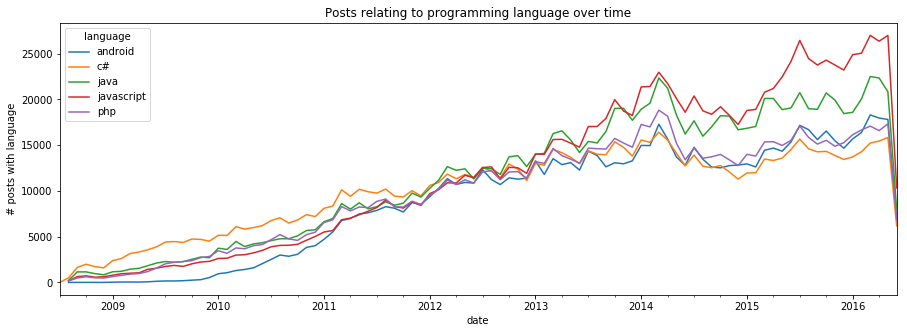

In [22]:
year = '2016' # year based on which most frequent technology is selected

query = """SELECT year, month, technology, count(*) AS count
    FROM stackoverflow.stackoverflow_posts_small_languages
    GROUP BY year, month, technology"""

df = pd.read_gbq(query, project_id = "st446-activitycharts")

sdf = sqlContext.createDataFrame(df)
sdf = sdf.rdd.map(lambda row: np.array(row))

sdf = sdf.filter(lambda row: row[0] == year)
sdf = sdf.map(lambda row: (row[2], int(row[3])))
sdf = sdf.reduceByKey(lambda x, y: x+y) # sum count for each technology
sdf = sdf.sortBy(lambda row: -row[1]) # order technology in descending order

freq_lang = sdf.take(6)
lang = list()

for i in range(1,6):
    # add highest 5 elements to lang list, skip 1 since ""
    lang.append(freq_lang[i][0])

df_lang = lang_filter(df, lang)
activity_chart(df_lang, "Posts relating to technology over time", "# posts with technology")

### Posts count by technology, year, month - selected technologies

The below code returns the number of posts created in a given month and year, which are associated with the input Big Data technologies.

In [2]:
def postsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.stackoverflow_posts` ) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Questions created by technology, year, month - selected technologies

The below code returns the number of questions created in a given month and year, which are associated with the input Big Data technologies.

In [3]:
def questionsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Questions view count by technology, year, month - selected technologies

The below code returns the total view count for questions created in a given month and year, which are associated with the input Big Data technologies. It is to be expected that the view count decreases over the years for two reasons: a) the most relevant (and thus mostly viewed) questions are typically asked earlier and b) for more recent vs. older questions there has been less time to view these questions.

In [4]:
def questionsViewsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, SUM(view_count) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        view_count,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Total view count of questions created in 2014 - 2017 by technology - selected technologies

The below code returns the total view count for questions created in the years 2014 to 2017, which are associated with the input Big Data technologies. It is to be expected that the view count decreases over the years for two reasons: a) the most relevant (and thus mostly viewed) questions are typically asked earlier and b) for more recent vs. older questions there has been less time to view these questions.

In [5]:
def questionsViews1417TechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, technology, SUM(view_count) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        view_count,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL AND year BETWEEN 2014 AND 2017
        GROUP BY technology, year""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

###  Average view count of questions created in 2014 - 2017 by technology - selected technologies

The below code returns the average view count for questions created in the years 2014 to 2017, which are associated with the input Big Data technologies.

In [6]:
def questionsAvgViewsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, '1' as month, technology, AVG(view_count) as count
       FROM
       ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
       EXTRACT (MONTH FROM creation_date) AS month,
       view_count,
       CASE WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'  
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}'
       WHEN tags like '{}'
           THEN '{}' 
       END as technology
       FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
       WHERE technology IS NOT NULL
       GROUP BY year, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

###  View count distribution of questions created in selected time frame by technology - selected technologies

The below code returns the view count for each question created in the selected time frame and associated with the input Big Data technologies. This code is used as input for the boxplots.

In [7]:
def questionsViewsDistributionTechnology(technology, names, start_year, end_year):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT technology, view_count as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        view_count,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL AND year BETWEEN {} and {}""".format(*comb, start_year, end_year)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### % answer ratio for questions created in 2014-2017 by technology - selected technologies

The below code returns the % answer ratio for questions created in 2014-2017, which are associated with the input Big Data technologies. A question is marked as answered, when there are 1 or more answers to the questions, not, whether the answer was accepted by the question creator. It is to be expected that the % answer ratio decreases over the years for two reasons: a) the most relevant (and thus more often answered) questions are typically asked earlier and b) for more recent vs. older questions there has been less time to answer these questions.

In [8]:
def questionsAnsweredTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, technology,
        ROUND(SUM(IF(answer_count>0,1,0))/COUNT(*),2) AS perc_answered
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        view_count,
        answer_count,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL AND year BETWEEN 2014 AND 2017
        GROUP BY technology, year""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### % accepted answer ratio for questions created in 2014-2017 by technology - selected technologies

The below code returns the % accepted answer ratio for questions created in 2014-2017, which are associated with the input Big Data technologies. A question is marked as answered, when the answer is accepted by the question creator. It is meant to provide an indication on how easy questions on Big Data technologies can be answered. It is to be expected that the % answer ratio decreases over the years for two reasons: a) the most relevant (and thus more often answered) questions are typically asked earlier and b) for more recent vs. older questions there has been less time to answer these questions.

In [9]:
def questionsAcceptedAnsweredTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, technology,
        ROUND(SUM(IF(accepted_answer_id IS NOT NULL,1,0))/COUNT(*),2) AS perc_answered
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        view_count,
        accepted_answer_id,
        CASE WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        WHEN tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.posts_questions` ) as techtable
        WHERE technology IS NOT NULL AND year BETWEEN 2014 AND 2017
        GROUP BY technology, year""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### % answer ratio within 1 hour for questions created in 2014-2017 by technology - selected technologies

The below code returns the % answer ratio within 1 hour for questions created in 2014-2017, which are associated with the input Big Data technologies. A question is marked as answered, when there are 1 or more answers to the questions, not, whether the answer was accepted by the question creator. The % answer ratio within 1 hour is meant to provide an indicator whether questions can be easily (and therefore quickly) answered.

In [10]:
def oneHourAnsweredTechnologyYearMonth(technology, names):

    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, technology, AVG(hour_answered) AS withinhour
        FROM
        ( SELECT question.id,
        EXTRACT (YEAR FROM question.creation_date) AS year,
        MAX(IF(answer.parent_id IS NOT NULL AND 
            (UNIX_SECONDS(answer.creation_date)-UNIX_SECONDS(question.creation_date))/(60*60) <= 1,1,0)) AS hour_answered,
        CASE WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        END as technology    
        FROM `bigquery-public-data.stackoverflow.posts_questions` question
        LEFT JOIN `bigquery-public-data.stackoverflow.posts_answers` answer
        ON question.id = answer.parent_id
        GROUP BY question.id, year, technology) as techtable
        WHERE technology is NOT NULL and year BETWEEN 2014 and 2017
        GROUP BY technology, year""".format(*comb)

    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### % accepted answer ratio within 1 hour for questions created in 2014-2017 by technology - selected technologies

The below code returns the % accepted answer ratio within 1 hour for questions created in 2014-2017, which are associated with the input Big Data technologies. A question is marked as answered, when the answer was accepted by the question creator.

In [11]:
def oneHourAcceptedAnsweredTechnologyYearMonth(technology, names):

    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, technology, AVG(hour_answered) AS withinhour
        FROM
        ( SELECT question.id,
        EXTRACT (YEAR FROM question.creation_date) AS year,
        MAX(IF(answer.parent_id IS NOT NULL AND 
            (UNIX_SECONDS(answer.creation_date)-UNIX_SECONDS(question.creation_date))/(60*60) <= 1 AND
            answer.id = question.accepted_answer_id,1,0)) AS hour_answered,
        CASE WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        WHEN question.tags like '{}'
            THEN '{}'
        END as technology    
        FROM `bigquery-public-data.stackoverflow.posts_questions` question
        LEFT JOIN `bigquery-public-data.stackoverflow.posts_answers` answer
        ON question.id = answer.parent_id
        GROUP BY question.id, year, technology) as techtable
        WHERE technology is NOT NULL and year BETWEEN 2014 and 2017
        GROUP BY technology, year""".format(*comb)

    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

# Github

## Overview

Github is a leading software development platform allowing programmers to cooperate in writing code through extensive version control features using git. It was founded in 2008 by Tom Preston-Werne, Christ Wanstrath and PJ Hyett. Within Github, users can create repositories to host code and files and can invite other users to collaborate. In the code development phase, users can create subbranches from the master branch and later submit (making a pull request) their code changes into the master branch. Changes made to code or files are called commits. As of March 2017, Github had 26 million users. 

Google BigQuery hosts a public dataset on Github with a variety of tables. The following tables were used to analyse activity and popularity of various Big Data Technologies:

- <b> commits: </b> a dataset of commits since 2008. It consists of ids for the commit, the tree and parent, the author, time, subject and message and the corresponding repository. Message, subject and the name of the repository are searched for mentions of Big Data Technology in the analyses hereafter. The dataset consists of 215.5m records.

- <b> githubarchive: </b> a complete dataset with all events within Github, e.g. ForkEvent, CommitCommentEvent, IssuesEvent etc. A complete list of all possible events within Github can be found [here](https://developer.github.com/v3/activity/events/types/). Additionally, it includes the repository name, the author and the creation date. The data is available on a daily, monthly and yearly basis. The 2017 dataset consists of 413.1m records.

## Queries

### Events in selected year with repo name containing technology - selected technologies

The below code returns the number of Github events occured between 2014-2017 whose payload mentions the input Big Data technologies.

In [12]:
def reposEventsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        CASE WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        END as technology
        FROM 
        (SELECT created_at, repo.name AS repo FROM `githubarchive.year.2017`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2016`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2015`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly Events between 2014-2017 with payload containing technology - selected technologies

The below code returns the number of Github events occured between 2014-2017 whose payload mentions the input Big Data technologies.

In [13]:
def payloadEventsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        CASE WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        END as technology
        FROM 
        (SELECT created_at, payload FROM `githubarchive.year.2017`
        UNION ALL SELECT created_at, payload FROM `githubarchive.year.2016`
        UNION ALL SELECT created_at, payload FROM `githubarchive.year.2015`
        UNION ALL SELECT created_at, payload FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly Events between 2014-2017 with repo name containing technology - selected technologies

The below code returns the number of Github events occured between 2014-2017 where the repository name contains the input Big Data technologies.

In [14]:
def reposEventsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        CASE WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        END as technology
        FROM 
        (SELECT created_at, repo.name AS repo FROM `githubarchive.year.2017`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2016`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2015`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly Fork Events between 2014-2017 with payload containing technology - selected technologies

The below code returns the number of Github Fork events occured between 2014-2017 whose payload mentions the input Big Data technologies.

In [15]:
def payloadForkEventsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        type,
        CASE WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        WHEN payload like '{}'
            THEN '{}'
        END as technology
        FROM 
        (SELECT type, created_at, payload FROM `githubarchive.year.2017`
        UNION ALL SELECT type, created_at, payload FROM `githubarchive.year.2016`
        UNION ALL SELECT type, created_at, payload FROM `githubarchive.year.2015`
        UNION ALL SELECT type, created_at, payload FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL AND type = 'ForkEvent'
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly Fork Events between 2014-2017 with repo name containing technology - selected technologies

The below code returns the number of Github Fork events occured between 2014-2017 whose repository name contained the input Big Data technologies.

In [16]:
def reposForkEventsTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        type,
        CASE WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        WHEN repo like '{}'
            THEN '{}'
        END as technology
        FROM 
        (SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2017`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2016`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2015`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL AND type = 'ForkEvent'
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly commits for repos with name containing technology by month, year - selected technologies

The below code returns the number of Github monthly commits for repositories whose name contains the input Big Data technologies by mont and year.

In [17]:
def commitsReposTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM committer.date) AS year,
        EXTRACT (MONTH FROM committer.date) AS month,
        CASE WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.github_repos.commits`) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Monthly commits with message containing technology by month, year - selected technologies

The below code returns the number of Github monthly commits for messages naming the input Big Data technologies by mont and year.

In [18]:
def commitsMessageTechnologyYearMonth(technology, names):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM committer.date) AS year,
        EXTRACT (MONTH FROM committer.date) AS month,
        CASE WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        WHEN message like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.github_repos.commits`) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*comb)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

### Total commits for repos with name containing technology - selected time frame and technologies

The below code returns the number of total Github commits for repositories whose name contains the input Big Data technologies in a given timeframe.

In [19]:
def commitsReposTechnologyYear(technology, names, start_year, end_year):
    
    comb = sum(map(list, zip(technology, names)), [])
    query = """SELECT technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM committer.date) AS year,
        CASE WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        WHEN repo_name[OFFSET(0)] like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.github_repos.commits`) as techtable
        WHERE technology IS NOT NULL AND year BETWEEN {} AND {}
        GROUP BY technology
        ORDER BY COUNT(*) DESC""".format(*comb, start_year, end_year)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))

# Data Visualization

The below functions create the visualization of the query outputs.

In [20]:
def activity_chart(dataframe, maintitle, ytitle):
    # combine month & year, pivot dataframe for technology, datetime and count
    dataframe['date'] = dataframe.apply(lambda row: datetime(int(row['year']), int(row['month']), 1), axis=1)
    dataframe.drop(['year', 'month'], axis=1)
    dataframe = dataframe.pivot(index='date',columns='technology', values='count')
    dataframe = dataframe.astype(float)

    plt.close()
    dataframe.plot(figsize=(15,5))
    plt.xlabel('date')
    plt.ylabel(ytitle)
    plt.title(maintitle)
    plt.show()

def activity_barplot_single(dataframe, maintitle, ytitle):
    dataframe = dataframe.iloc[::-1]
    plt.close()
    dataframe.plot.barh(x=dataframe.iloc[:,0], color='darkolivegreen')
    plt.ylabel(ytitle)
    plt.title(maintitle)
    plt.show()

def activity_barplot_several(dataframe, row, column, value, maintitle, ytitle):
    plt.close()
    dataframe.pivot(index=row, columns=column, values=value).plot.bar()
    plt.ylabel(ytitle)
    plt.title(maintitle)
    plt.show()
    
def boxplot_single(dataframe, maintitle, ytitle):
    data = []
    names = dataframe.technology.unique()

    # Convert dataframe to list of lists
    for i in range(0, len(dataframe.technology.unique())):
        temp = dataframe[dataframe['technology'] == names[i]]['count'].tolist()
        data.append(temp)

    plt.close()
    fig, ax = plt.subplots(figsize=(16,4))
    ax.boxplot(data)
    plt.ylim(0,500)
    plt.ylabel(ytitle)
    plt.title(maintitle)
    ax.set_xticklabels(names.tolist())
    plt.show()

# Big Data technologies

The goal of the report is to describe the popularity of various BigData technologies over time. Popularity is measured by the occurance of those technologies on Stackoverflow and Github. The Big Data technologies were assembled based on the course outline in ST446 - Distributed Computing for Big Data, own research and input from Prof. Vojnovic. The technologies were grouped into the following categories, which will be analysed in detail subsequently:
- Distributed key-value stores
- Distribution computation technologies
- Streaming technologies
- Structured query languages
- Graph data processing
- Machine Learning packages (other than for deep learning)
- Deep learning frameworks and packages

The below charts are meant to give an indication on two aspects of the Big Data technology: their popularity and their easiness of use. The former is measured by the amount of Stackoverflow questions, posts, view count, answers, Github events and commits relating to the specific technology, while the answer fraction is assumed to be an indicator of the difficulty of the programming language. It is assumed that questions on difficult technologies (in terms of set-up and programming) will on average take longer to be answered or will not be answered at all. Obviously, this assumption might be flawed. If the time to answer truly only indicates the size of the expert pool capable of answering questions, it is merely an additional indicator of the technology popularity. Since no other indicators on the difficulty of technology is available, this indicator will be used for now with the above caveat.

## Distributed key-value stores

### Introduction

Distributed key-values stores are databases, where large-scale data are partitioned into information chunks that are stored on multiple servers and typically replicated on multiple nodes. These databases are either relational (SQL) or non-relational (noSQL). Relational databases store and retrieve data in a tabular form, whereas non-relational databases, to which most distributed key-value stores belong, use some other form of data storage and retrieval. Often, distributed key-value stores also come with with query language that allows to quickly access large data volumes. The following key-value stores will be compared to each other in terms of popularity with the release year and type (SQL or noSQL) indicated in brackets:
- Amazon DynamoDB (2012, noSQL)
- Microsoft Azure SQL Database (2010, SQL) $^{1)}$
- Microsoft Azure CosmosDB (2014, noSQL) $^{1)}$
- Google BigTable (2005, noSQL)
- Apache Cassandra (2008, noSQL)
- Apache HBase (2007, noSQL)
- MongoDB (2009, noSQL)

1) Other database services are also offered as part of Azure such as Azure Data Lake or Azure StorSimple. The above analysis focuses on the most dominant databases SQL Database and CosmosDB.

### Activity Charts

In [21]:
db_list = ['%dynamodb%', '%bigtable%', '%cassandra%', 'hbase%', '%mongodb%', '%cosmosdb%', '%azure-sql%', None, None, None] # hbase withouth % at front to avoid confusion with couchbase 
db_names = ['Amazon Dynamo', 'Google Bigtable', 'Apache Cassandra', 'Apache HBase', 'MongoDB', 'Azure CosmosDB', 'Azure SQL Database', None, None, None]

Requesting query... ok.
Job ID: 084b5640-eb67-4347-b60f-684c5c0a246e
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 402 rows.

Total time taken 4.51 s.
Finished at 2018-04-19 12:02:26.


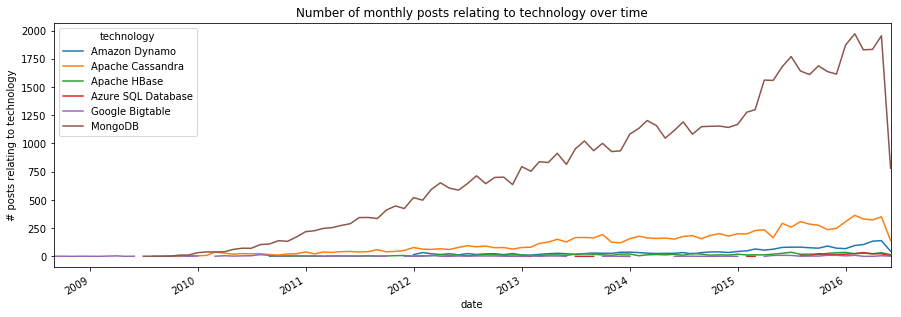

In [22]:
df = postsTechnologyYearMonth(db_list, db_names)
# df = questionsTechnologyYearMonth(db_list, db_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 895c94c1-67f0-4af2-a032-1195a55fb887
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 28 rows.

Total time taken 4.13 s.
Finished at 2018-04-13 15:12:27.


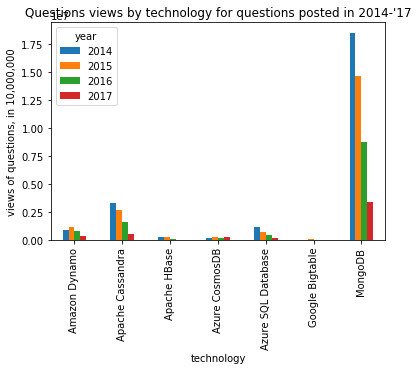

In [234]:
# df = questionsViewsTechnologyYearMonth(db_list, db_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(db_list, db_names)
df = questionsViews1417TechnologyYearMonth(db_list, db_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology for questions posted in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: d795f94b-629a-4af1-b0af-cebde6acfc97
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 52248 rows.

Total time taken 5.78 s.
Finished at 2018-04-13 14:09:11.


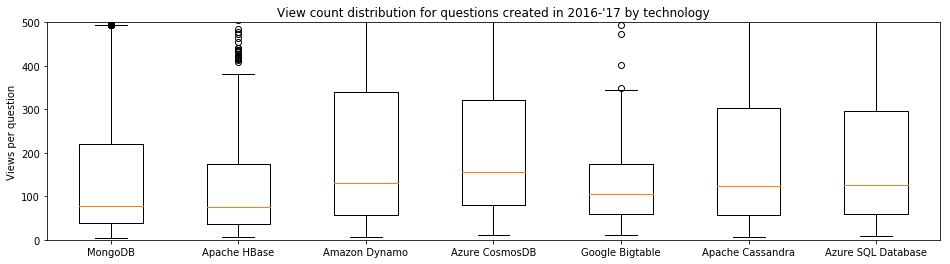

In [215]:
df = questionsViewsDistributionTechnology(db_list, db_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: 7639dd42-f0dc-46ac-8991-4fce82d54bed
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 28 rows.

Total time taken 4.5 s.
Finished at 2018-04-13 13:54:17.


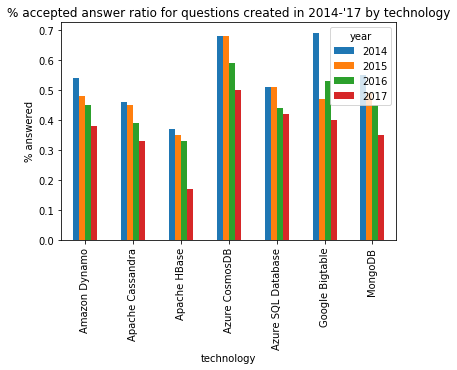

In [211]:
# df = questionsAnsweredTechnologyYearMonth(db_list, db_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(db_list, db_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: 45d929de-eda8-4651-a059-8ac3536217bc
Query running...
Query done.
Cache hit.

Retrieving results...
Got 28 rows.

Total time taken 1.86 s.
Finished at 2018-04-13 14:32:39.


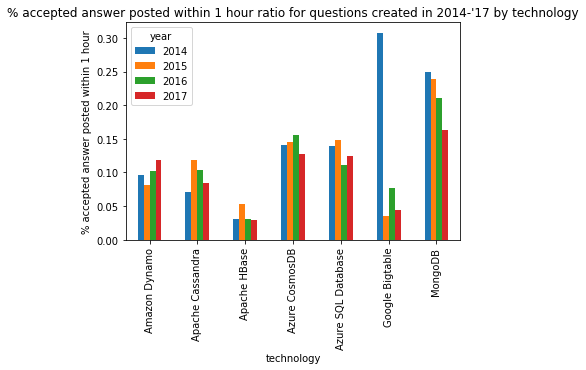

In [228]:
# df = oneHourAnsweredTechnologyYearMonth(db_list, db_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(db_list, db_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

Requesting query... ok.
Job ID: 4c70abcb-d446-4f86-9ea8-46b64065c2e0
Query running...
Query done.
Cache hit.

Retrieving results...
Got 285 rows.

Total time taken 1.67 s.
Finished at 2018-04-13 11:35:13.


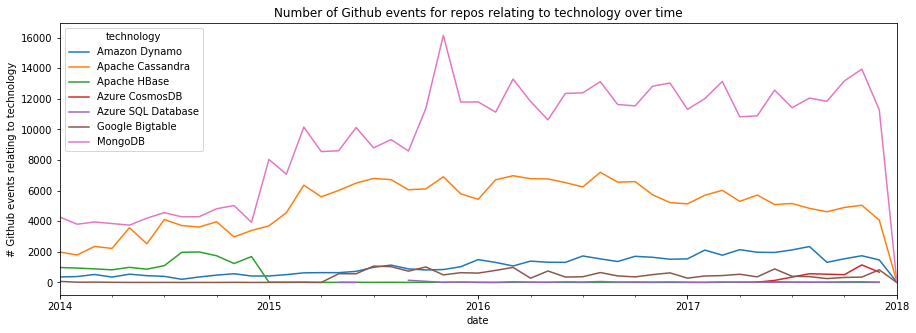

In [55]:
# df = payloadEventsTechnologyYearMonth(db_list, db_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(db_list, db_names)
# df = payloadForkEventsTechnologyYearMont(db_list_db_names)
df = reposEventsTechnologyYearMonth(db_list, db_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 012cf3d0-d3d5-442c-b9e9-b6b33854ed49
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 378 rows.

Total time taken 8.12 s.
Finished at 2018-04-13 13:53:41.


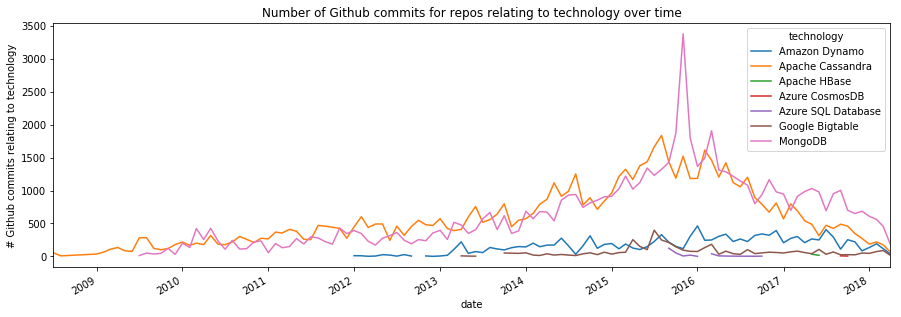

In [208]:
# df = commitsMessageTechnologyYearMonth(db_list, db_names)
df = commitsReposTechnologyYearMonth(db_list, db_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: b33ed67b-ff2d-4c51-a9d8-586b3fdd3f57
Query running...
Query done.
Cache hit.

Retrieving results...
Got 7 rows.

Total time taken 1.59 s.
Finished at 2018-04-13 11:32:58.


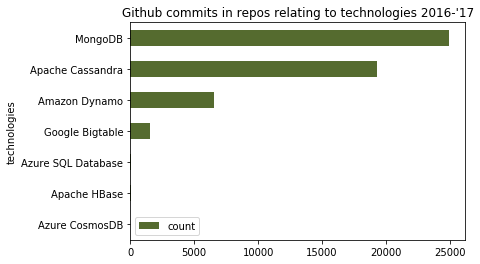

In [37]:
df = commitsReposTechnologyYear(db_list, db_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

In terms of number of Stackoverflow posts, view count of Stackoverflow question, Github events and Github commits, MongoDB seems to be most popular, followed by Apache Cassandra and Amazon Dynamo. The dynamics of Stackoverflow and Github are temporally closely related - a characteristic we will repeatedly see below. The median view count per question  differs between 76 for MongoDB and Apache HBase up to 156 for Azure CosmosDB. Azure CosmosDB also achieves the highest accepted answer ratio across all years, followed by Azure SQL Database, Google Bigtable and MongoDB. When looking at the fraction of questions for which the accepted answer was posted within 1 hour of posting the question, MongoDB dominates the other technologies with ~20% followed by Azure CosmosDB and Azure SQL Database. The difference gives rise to the concern formulated earlier, e.g. that a higher fraction of accepted answer within 1 hour might merely indicate a larger expert pool for MongoDB and therefore larger popularity rather than the difficulty of the technology. However, the long-run accepted answer fraction might still indicate that Azure CosmosDB might be easier to use (and hence answer questions on) than MongoDB.

## Data processing engines

### Introduction

Data processing engines for distributed computing are frameworks for distributed processing of large-scale data. The most predominant engines used today are Apache Hadoop and Apache Spark. Hadoop was released in 2011. The core of Hadoop consists of  the Hadoop Distributed File System (HDFS) for distributed data storage and its well-known programming model MapReduce for data processing. Spark, which was initially released in 2014 and does not possess an own file management system, but relies on HDFS. Its core is a data processing engine. The following charts will compare Apache Spark with Hadoop and MapReduce (which is the closer comparison to Spark). For an overview of differences between hadoop and Spark, please refer [here](https://www.datamation.com/data-center/hadoop-vs.-spark-the-new-age-of-big-data.html) oder [here](
https://www.quora.com/What-is-the-difference-between-Hadoop-and-Spark)

### Activity Charts

In [23]:
dpe_list = ['%spark%', '%hadoop%', '%mapreduce%', None, None, None, None, None, None, None]
dpe_names = ['Apache Spark', 'Hadoop', 'MapReduce', None, None, None, None, None, None, None]

Requesting query... ok.
Job ID: 8dfb0215-e943-4f96-9ae8-9d1cbf0dac37
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 278 rows.

Total time taken 4.63 s.
Finished at 2018-04-19 12:02:47.


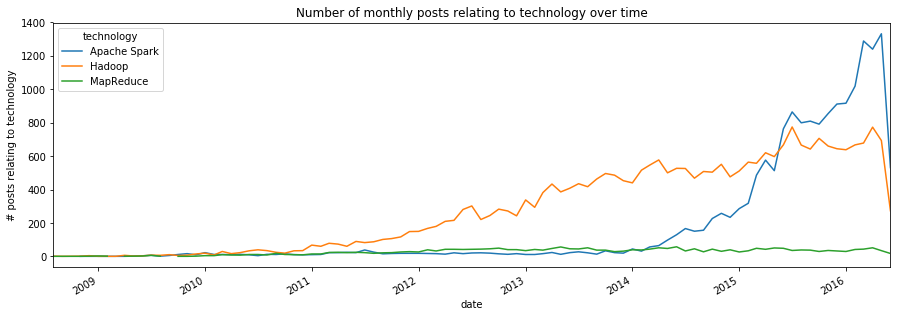

In [24]:
df = postsTechnologyYearMonth(dpe_list, dpe_names)
# df = questionsTechnologyYearMonth(dpe_list, dpe_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 6a95941c-132b-4bb3-b4c9-029dfc2c5c1f
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 12 rows.

Total time taken 5.34 s.
Finished at 2018-04-19 12:02:56.


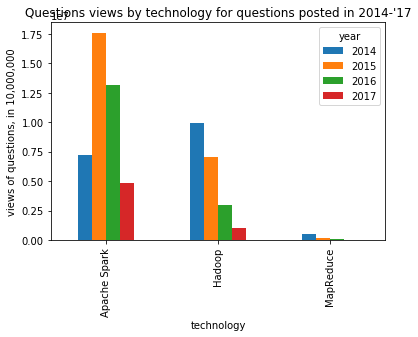

In [25]:
# df = questionsViewsTechnologyYearMonth(dpe_list, dpe_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(dpe_list, dpe_names)
df = questionsViews1417TechnologyYearMonth(dpe_list, dpe_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology for questions posted in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: 28144950-1e3e-435b-b397-a1e596170994
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 42781 rows.

Total time taken 5.95 s.
Finished at 2018-04-19 12:03:06.


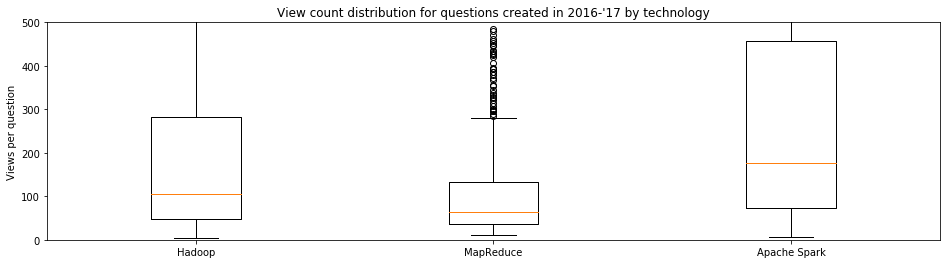

In [26]:
df = questionsViewsDistributionTechnology(dpe_list, dpe_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: 5988349d-5264-4527-a20a-c4b095706b56
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 12 rows.

Total time taken 4.82 s.
Finished at 2018-04-19 12:03:19.


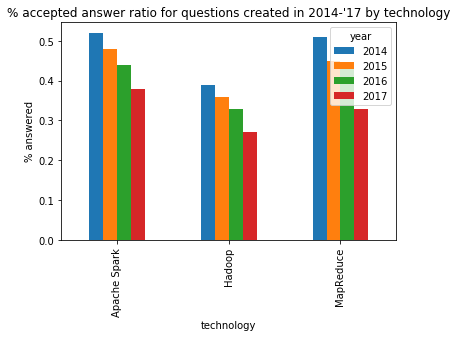

In [27]:
# df = questionsAnsweredTechnologyYearMonth(dpe_list, dpe_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(dpe_list, dpe_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: 20eba175-fadb-49c6-9f9e-e5786661b8ec
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 12 rows.

Total time taken 7.73 s.
Finished at 2018-04-19 12:03:34.


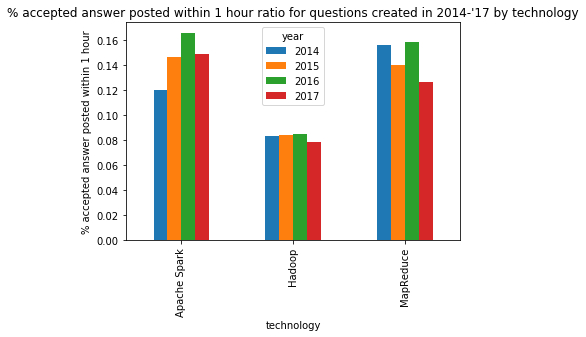

In [28]:
# df = oneHourAnsweredTechnologyYearMonth(dpe_list, dpe_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(dpe_list, dpe_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

Requesting query... ok.
Job ID: f8f0fb3a-01f1-42b4-a2ec-3fb2469b57a7
Query running...
  Elapsed 7.4 s. Waiting...
  Elapsed 8.77 s. Waiting...
  Elapsed 10.04 s. Waiting...
  Elapsed 11.38 s. Waiting...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 155 rows.

Total time taken 13.39 s.
Finished at 2018-04-19 12:03:53.


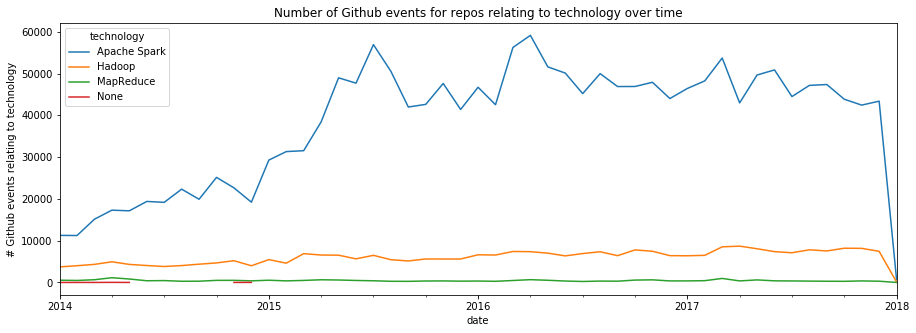

In [29]:
# df = payloadEventsTechnologyYearMonth(dpe_list, dpe_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(dpe_list, dpe_names)
# df = payloadForkEventsTechnologyYearMont(dpe_list_dpe_names)
df = reposEventsTechnologyYearMonth(dpe_list, dpe_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 08f18bb7-c689-4ec8-9de7-06c5a26c987c
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 427 rows.

Total time taken 7.35 s.
Finished at 2018-04-19 12:04:08.


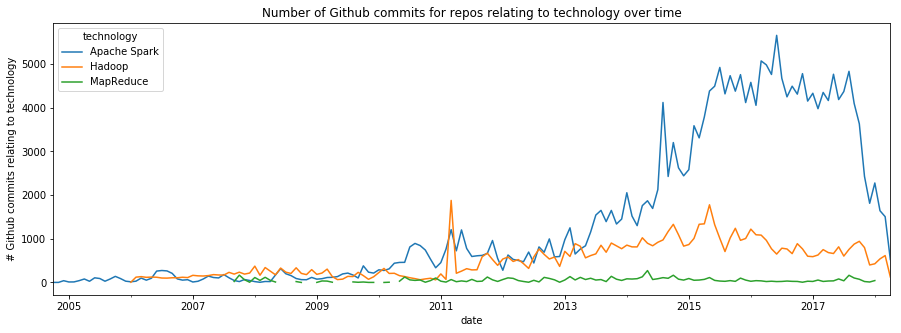

In [30]:
# df = commitsMessageTechnologyYearMonth(dpe_list, dpe_names)
df = commitsReposTechnologyYearMonth(dpe_list, dpe_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: a267a2be-af18-4871-bf9b-3e1858f2e662
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 3 rows.

Total time taken 6.48 s.
Finished at 2018-04-19 12:04:19.


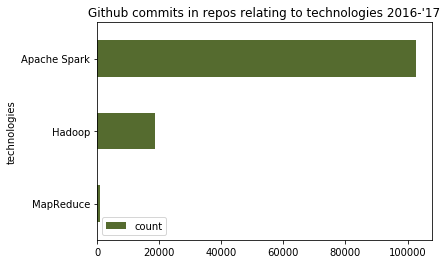

In [31]:
df = commitsReposTechnologyYear(dpe_list, dpe_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

The number of Stackoverflow posts over time clearly indicate, when the respective engines were released, e.g. Hadoop in 2011 and Spark in 2014. Spark appears to have become popular more quickly than Hadoop and surpassed Hadoop in the number of monthly posts in mid-2015. This observation is confirmed by the view count. While Hadoop was still stronger in 2014, questions posted in 2015 relating to spark had a total 17.5 million view counts vs. 7.5 million for Hadoop. The higher view count continues for 2016 and 2017. The median Hadoop question was viewed 106 times versus 176 for Spark for questions created in the timeframe 2016-'17. The answer ratio (both long-term and within one hour) is significantly higher for Spark. Given that this difference has been consistent for all years (and does not only occur starting 2015, when Spark became more popular) might support the general view that Spark is easier to use than Hadoop. It should be noted, though, that the average answer ratio is lower for both Spark (~45% across all years) and Hadoop (~33%) than for the key-values stores analysed before (~55%). This observation also holds true for the accepted answer fraction within 1 hour. The Github graphs should be interpreted with caution due to the naming of Spark. In Stackoverflow, Spark is properly delineated from other technologies through tags. Such a distinction is not available in Github. Therefore, searching for 'spark' in repository names might return an artificially high value for Spark. Nevertheless, the same dynamics can be seen as for Stackoverflow posts, e.g. a sharp increase in the number of events and commits relating to Spark between 2014 and 2016.

## Stream Processing

### Introduction

Stream processing applications allow users "real-time processing of high-volume data streams" (Stonebraker et al., 2005). Such application allow for parallel processing without the user needing to specify resource allocation or synchronization. A variety of streaming applications are available today, which are listed below with their release date and Stackoverflow tags in brackets:

- Apache Storm (2011, apache-storm)
- Apache Spark Streaming (2014, spark-streaming)
- Apache Flink (2014, flink)
- Apache Flume (2011, flume)
- Apache Nifi (2014, apache-nifi) - excluded from below plots since marginally small
- Apache Apex (2012, apex)
- Apache Kafka (2011, kafka)
- Apache Samza (n/a, apache-samza) - excluded
- Apache Beam (2016, apache-beam) - excluded
- Apache Ignite (2015, n/a)  - excluded
- Apache Pulsar (n/a, pulsar)
- Confluent (2014, confluent) - excluded
- Amazon Kinesis (2013, kinesis)
- Amazon Simple Queue Service (SQS) (2006, amazon-sqs)
- Azure Stream Analytics (2010, azure-stream-analytics)

### Activity Charts

In [32]:
sp_list = ['%apache-storm%', '%spark-streaming%', '%flink%', '%flume%', '%azure-stream-analytics%', '%apex%', '%kafka%', '%kinesis%', '%amazon-sqs%', '%pulsar%']
sp_names = ['Apache Storm', 'Apache Spark Streaming', 'Apache Flink', 'Apache Flume', 'Azure Stream Analytics', 'Apache Apex', 'Apache Kafka', 'Amazon Kinesis', 'Amazon SQS', 'Apache Pulsar']

Requesting query... ok.
Job ID: 28e8dd27-817b-46a3-8320-5acc43941ffc
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 431 rows.

Total time taken 3.88 s.
Finished at 2018-04-19 12:04:31.


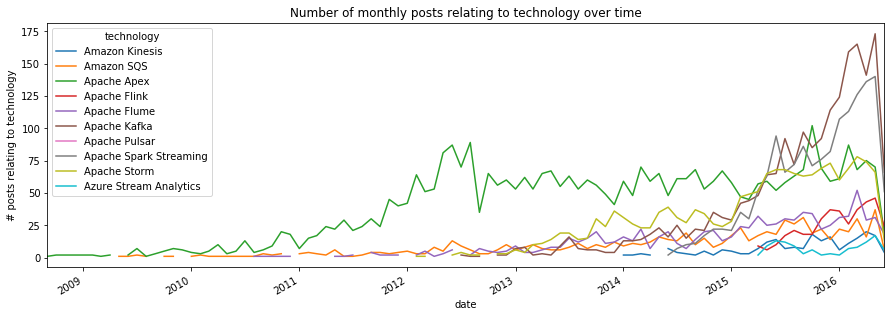

In [33]:
df = postsTechnologyYearMonth(sp_list, sp_names)
# df = questionsTechnologyYearMonth(sp_list, sp_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: f41e5fcc-2515-4a68-8836-2cdff866e24c
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 37 rows.

Total time taken 5.31 s.
Finished at 2018-04-19 12:06:13.


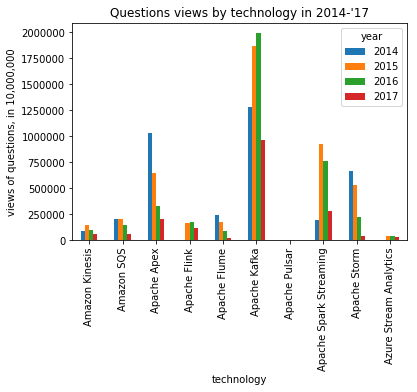

In [34]:
# df = questionsViewsTechnologyYearMonth(sp_list, sp_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(sp_list, sp_names)
df = questionsViews1417TechnologyYearMonth(sp_list, sp_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: d918569b-7bbc-4ff8-af8f-f80c074ced34
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 13596 rows.

Total time taken 5.42 s.
Finished at 2018-04-19 12:06:20.


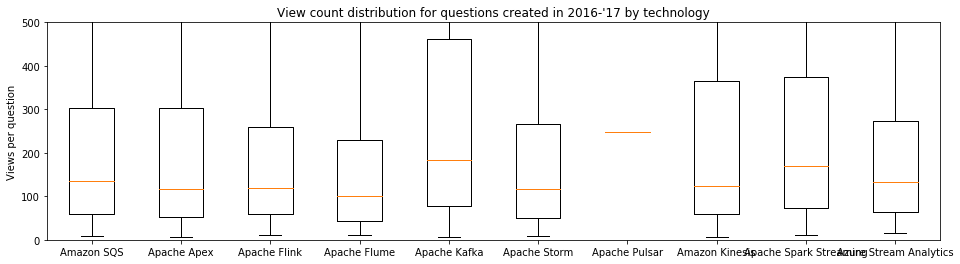

In [35]:
df = questionsViewsDistributionTechnology(sp_list, sp_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: 18fb5d03-046b-4eb7-95f2-1bd3999c9060
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 37 rows.

Total time taken 5.44 s.
Finished at 2018-04-19 12:06:27.


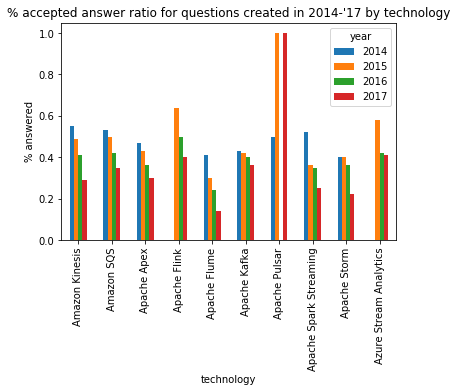

In [36]:
# df = questionsAnsweredTechnologyYearMonth(sp_list, sp_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(sp_list, sp_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: 6d137252-e1c1-456d-80f2-8fa7dc499ed5
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 37 rows.

Total time taken 7.84 s.
Finished at 2018-04-19 12:06:36.


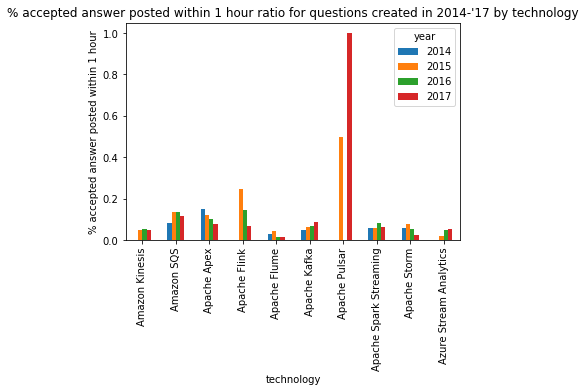

In [37]:
# df = oneHourAnsweredTechnologyYearMonth(sp_list, sp_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(sp_list, sp_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

In [38]:
sp_list = ['%apache-storm%', '%spark-stream%', '%flink%', '%flume%', '%azure-stream%', '%apex%', '%kafka%', '%kinesis%', '%amazon-sqs%', '%pulsar%']
sp_names = ['Apache Storm', 'Apache Spark Streaming', 'Apache Flink', 'Apache Flume', 'Azure Stream Analytics', 'Apache Apex', 'Apache Kafka', 'Amazon Kinesis', 'Amazon SQS', 'Apache Pulsar']

Requesting query... ok.
Job ID: 860f3013-cfa0-4b31-bc09-9659e33552bf
Query running...
  Elapsed 7.66 s. Waiting...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 459 rows.

Total time taken 9.71 s.
Finished at 2018-04-19 12:06:47.


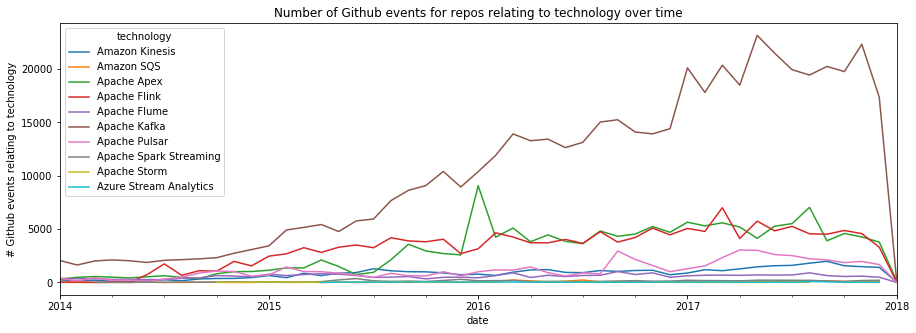

In [39]:
# df = payloadEventsTechnologyYearMonth(sp_list, sp_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(sp_list, sp_names)
# df = payloadForkEventsTechnologyYearMont(sp_list_sp_names)
df = reposEventsTechnologyYearMonth(sp_list, sp_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 6b0258f5-fd11-4976-98b8-4c7338aa0437
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 684 rows.

Total time taken 7.25 s.
Finished at 2018-04-19 12:06:55.


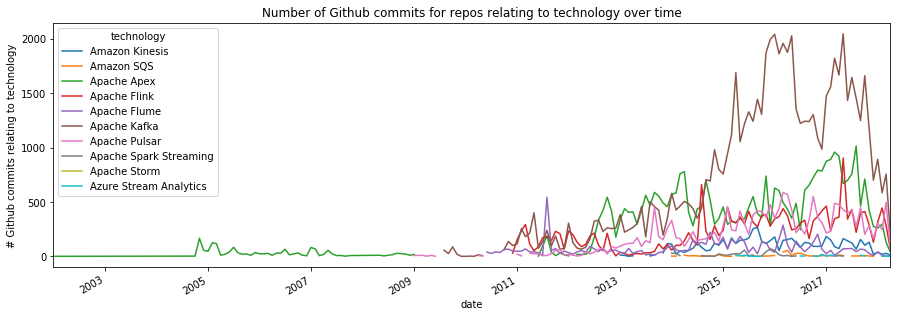

In [40]:
# df = commitsMessageTechnologyYearMonth(sp_list, sp_names)
df = commitsReposTechnologyYearMonth(sp_list, sp_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: eab9950c-8ddc-402d-919f-85221bca0ef5
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 10 rows.

Total time taken 7.82 s.
Finished at 2018-04-19 12:07:05.


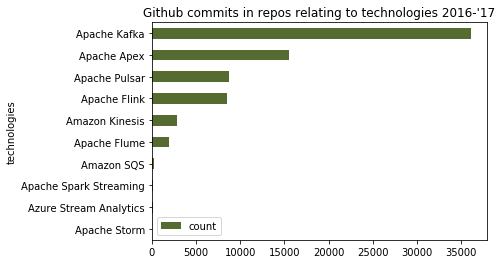

In [41]:
df = commitsReposTechnologyYear(sp_list, sp_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

Considering the number of Stackoverflow posts, Apache Kafka and Apache Spark Streaming have experienced a significant increase in popularity since 2015 and are the two technologies associated with the larges number of posts. The next most-dominant technologies are Apache Apex and Apache Storm. This observation is also confirmed, when considering the view count of questions. Moreover, Kafka and Spark Streaming also exhibit the highest view count per question with 183 and 169, respectively, when ignoring the outlier Apache Pulsar. The highest accepted answer ratios in the long-run and within 1 hour occur with Apache Flink, Kafka, and Azure Stream Analytics. The Github charts again have to be considered with caution, particularly in regards to Spark Streaming and Azure Stream Analytics. The query was changed manually to search for both criteria 'spark' and 'stream', however, not many more commits and events show up, which is likely due to the fact that repos might not be specifically labeled Spark Stream, even if they are relating to it. Outside of these two outliers, the events and commit charts generally confirm the findings from Stackoverflow, e.g. Kafka is most popular following by Apache Apex and Apache Flink.

## Structured Queries over big datasets

### Introduction

In order to retrieve information from large-scale, distributed datasets, several structured query technologies have been developed. These technologies have been described at the beginning of the report alongside BigQuery. The following technologies will be analysed with the initial release date and Stackoverflow tag in brackets:

- Apache Spark SQL (2012, apache-spark-sql)
- Apache Hive (2010, hive)
- Google BigQuery (2010, bigquery)
- Presto (2013, presto) 
- Amazon Redshift (2012, redshift)
- Microsoft Azure SQL (2010, azure-sql-database)

### Activity Charts

In [42]:
sq_list = ['%spark-sql%', 'hive%', '%bigquery%', '%presto%', '%redshift%', '%azure-sql%', None, None, None, None] # hive withouth % at front to avoid confusion with archive and related words 
sq_names = ['Apache Spark SQL', 'Apache Hive', 'Google BigQuery', 'Presto', 'Amazon Redshift', 'Microsoft Azure SQL', None, None, None, None]

Requesting query... ok.
Job ID: 74d5a1ed-df10-4b4d-acc9-5f0f9576679b
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 246 rows.

Total time taken 5.56 s.
Finished at 2018-04-19 12:07:12.


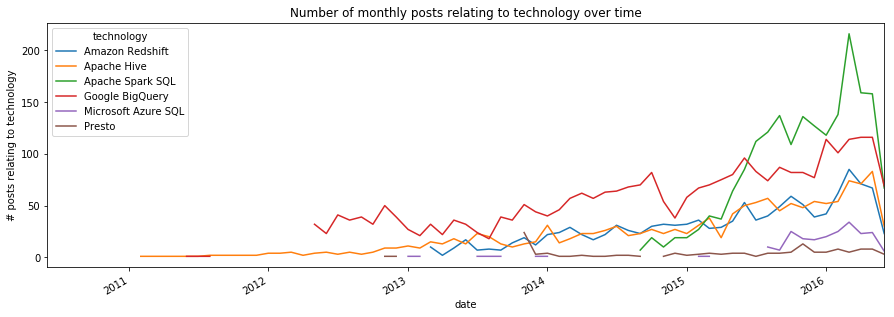

In [43]:
df = postsTechnologyYearMonth(sq_list, sq_names)
# df = questionsTechnologyYearMonth(sq_list, sq_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 6af60c33-543e-4ba4-9d15-5ceef4702ce2
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 4.6 s.
Finished at 2018-04-19 12:07:18.


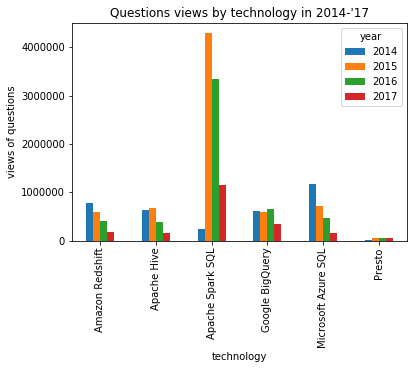

In [44]:
# df = questionsViewsTechnologyYearMonth(sq_list, sq_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(sq_list, sq_names)
df = questionsViews1417TechnologyYearMonth(sq_list, sq_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology in 2014-'17", "views of questions")

Requesting query... ok.
Job ID: 87b49f68-882f-4fb4-9609-d8e3500432a1
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 14276 rows.

Total time taken 4.85 s.
Finished at 2018-04-19 12:07:24.


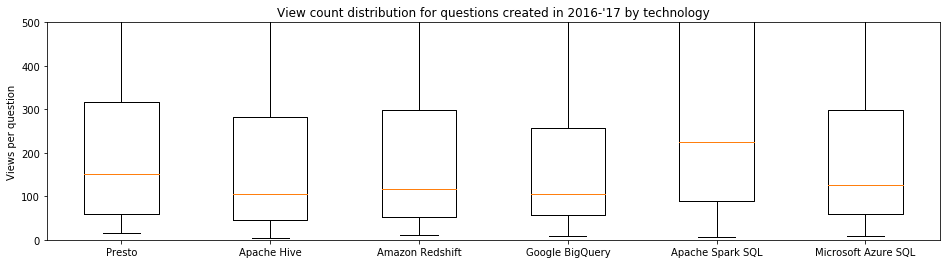

In [45]:
df = questionsViewsDistributionTechnology(sq_list, sq_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: ae4cce5b-1868-4d59-8920-7f51a3c6f23c
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 24 rows.

Total time taken 4.2 s.
Finished at 2018-04-19 12:07:29.


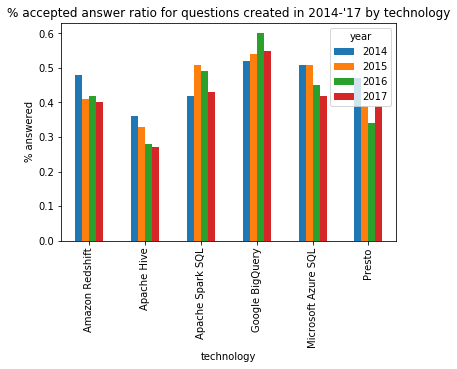

In [46]:
# df = questionsAnsweredTechnologyYearMonth(sq_list, sq_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(sq_list, sq_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: 8972b74c-4ad1-451c-a42b-c68591815fbc
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 24 rows.

Total time taken 7.54 s.
Finished at 2018-04-19 12:07:38.


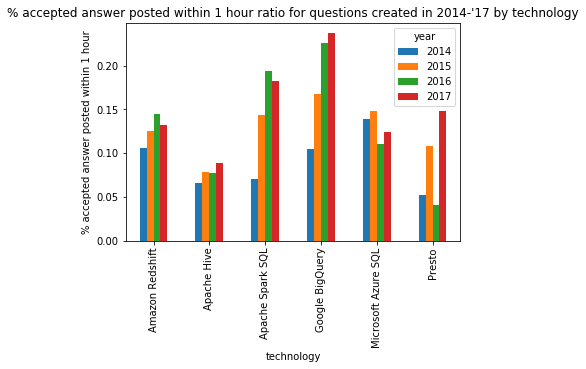

In [47]:
# df = oneHourAnsweredTechnologyYearMonth(sq_list, db_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(sq_list, sq_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

In [48]:
sq_list = ['%spark-sql%', 'hive%', '%bigquery%', '%presto%', '%redshift%', '%azure-sql%', None, None, None, None] # hive withouth % at front to avoid confusion with archive and related words 
sq_names = ['Apache Spark SQL', 'Apache Hive', 'Google BigQuery', 'Presto', 'Amazon Redshift', 'Microsoft Azure SQL', None, None, None, None]

Requesting query... ok.
Job ID: 645a629c-116e-4da1-a248-83071a3cf52e
Query running...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 282 rows.

Total time taken 8.89 s.
Finished at 2018-04-19 12:07:48.


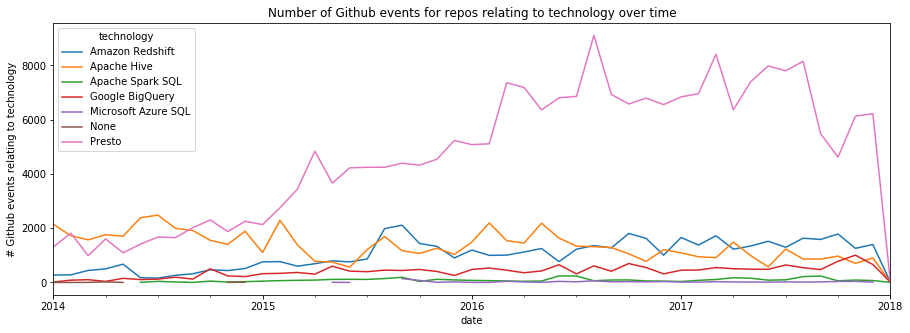

In [49]:
# df = payloadEventsTechnologyYearMonth(sq_list, sq_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(sq_list, sq_names)
# df = payloadForkEventsTechnologyYearMont(sq_list_sq_names)
df = reposEventsTechnologyYearMonth(sq_list, sq_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 416d9fff-c79d-4435-9600-3d07fc096b83
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 535 rows.

Total time taken 6.4 s.
Finished at 2018-04-19 12:07:56.


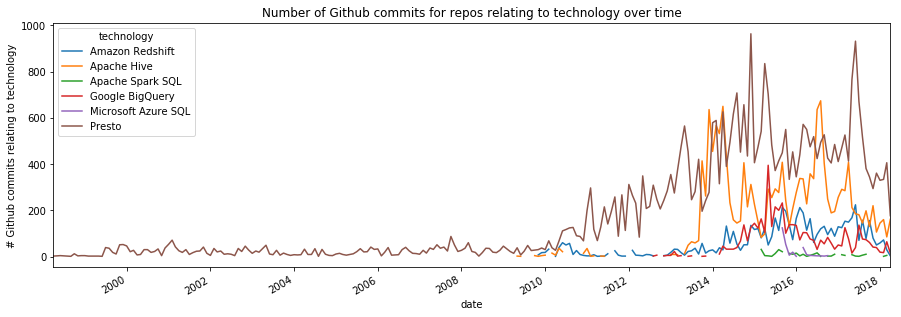

In [50]:
# df = commitsMessageTechnologyYearMonth(db_list, db_names)
df = commitsReposTechnologyYearMonth(sq_list, sq_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: 225827ce-fb10-4258-b492-dcc58f5c458a
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 6 rows.

Total time taken 6.8 s.
Finished at 2018-04-19 12:08:04.


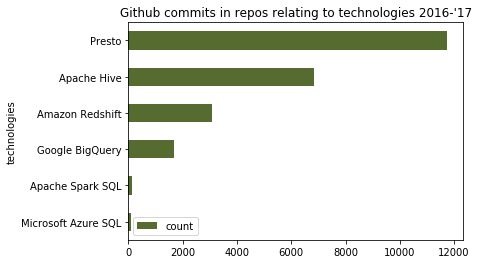

In [51]:
df = commitsReposTechnologyYear(sq_list, sq_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

According to the Stackoverflow posts, Apache Spark SQL is the most widely used structured query language, showing a rapid increase in popularity in 2015. The next-largest technology is Google BigQuery, which has been constantly, but slower growing since 2013. These two technologies are followed by Amazon Redshift and Apache Hive. Since Spark SQL (226 times) questions are viewed significantly more often than BigQuery (106), Redshift (116) and Apache Hive (106), Spark SQL has significantly more view counts. The highest answer ratio is achieved for questions relating to BigQuery, followed by Spark SQL and Azure SQL. Hive has a particularly low answer rate, which might be related to its diffulty level. Github tells a different story, but should again be evaluated with some caution, since users might not properly name repositories relating to Spark SQL or Azure SQL. Based on events and commits, Presto is the most widely used technology followed by Amazon Redshift, Apache Hive and Google BigQuery. One hypothesis for the difference between Github and Stackoverflow could be that Github is on average used by more advanced programmers, who more often use open-source software and programming frameworks that require more advanced programming skills.

## Graph Data Processing

### Introduction

A graph database is a database that stores and represents information in a graph structure. The subsequent queries retrieve the information via nodes and edges. A variety of both commercial and open-source tools have been developed for distributed graph data processing and are summarized in the below table - the release date and Stackoverflow tag are indicated in brackets:

- Apache Giraph (open-source counterpart to Pregel, 2012, giraph)
- Apache Spark GraphX (n/a, graphx)
- Apache Spark GraphFrames (n/a, graphframes) - excluded in below plots since minimal posts/questions relate to it
- Pregel (2010, pregel)
- Neo4j (2010, neo4j)
- Gremlin (n/a, gremlin)
- SparQL (2008, sparql)
- openCypher (originally created for Neo4j, 2015, cypher)
- NetworkX (2005, networkx)
- Graphlab (2013, graphlab) 

### Activity Charts

In [52]:
gp_list = ['%giraph%', '%graphx%', '%graphlab%', '%pregel%', '%neo4j%', '%gremlin%', '%sparql%', '%cypher%', '%networkx%', None] 
gp_names = ['Apache Giraph', 'Apache Spark GraphX', 'Graphlab Turi', 'Pregel', 'Neo4j', 'Gremlin', 'SparQL', 'openCypher', 'NetworkX', None]

Requesting query... ok.
Job ID: 57b10a77-2672-4059-9d6c-3f7d50cb387b
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 434 rows.

Total time taken 4.22 s.
Finished at 2018-04-19 12:08:10.


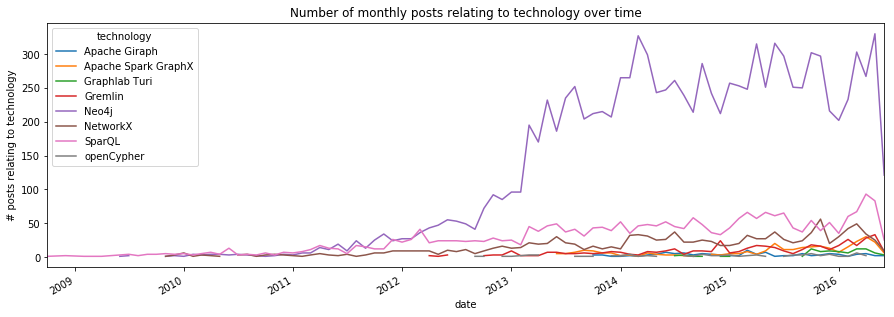

In [53]:
df = postsTechnologyYearMonth(gp_list, gp_names)
# df = questionsTechnologyYearMonth(gp_list, gp_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 399a496e-ecae-48bd-88c9-ae881633ba48
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 32 rows.

Total time taken 4.82 s.
Finished at 2018-04-19 12:08:16.


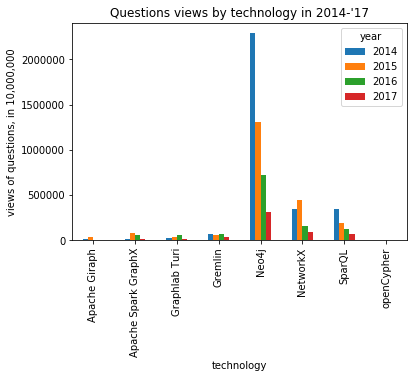

In [54]:
# df = questionsViewsTechnologyYearMonth(gp_list, gp_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(gp_list, gp_names)
df = questionsViews1417TechnologyYearMonth(gp_list, gp_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: 4dc88be7-8f6e-4ac2-b5cc-fc48bfb08ee5
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 9229 rows.

Total time taken 4.73 s.
Finished at 2018-04-19 12:08:22.


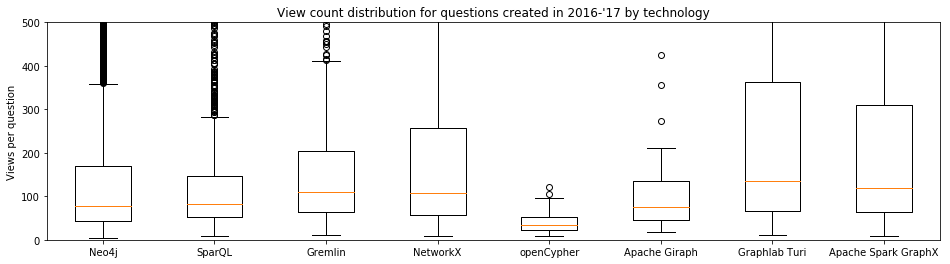

In [55]:
df = questionsViewsDistributionTechnology(gp_list, gp_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: a983969d-fdc7-448a-968c-067409600575
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 32 rows.

Total time taken 5.59 s.
Finished at 2018-04-19 12:08:29.


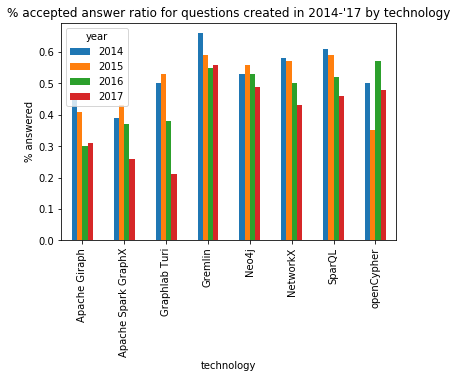

In [56]:
# df = questionsAnsweredTechnologyYearMonth(gp_list, gp_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(gp_list, gp_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: ca625744-71ca-4ed8-b9b4-4d0ca997827a
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 32 rows.

Total time taken 7.03 s.
Finished at 2018-04-19 12:08:38.


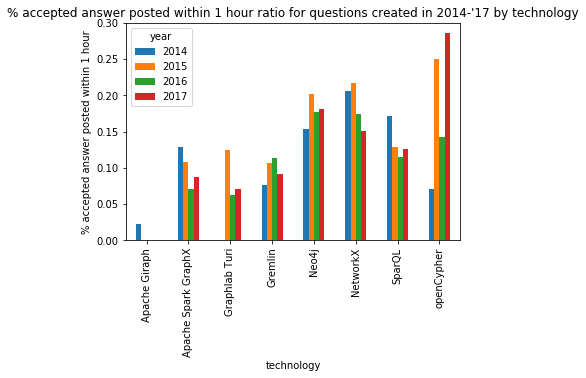

In [57]:
# df = oneHourAnsweredTechnologyYearMonth(gp_list, gp_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(gp_list, gp_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

Requesting query... ok.
Job ID: 4e8eb57b-6c6e-4cb7-84d8-968452c331ec
Query running...
  Elapsed 7.21 s. Waiting...
  Elapsed 8.56 s. Waiting...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 443 rows.

Total time taken 9.73 s.
Finished at 2018-04-19 12:08:49.


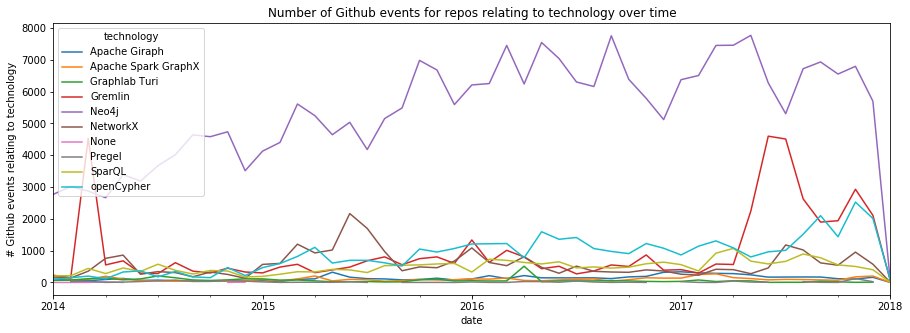

In [58]:
# df = payloadEventsTechnologyYearMonth(gp_list, gp_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(gp_list, gp_names)
# df = payloadForkEventsTechnologyYearMont(gp_list_gp_names)
df = reposEventsTechnologyYearMonth(gp_list, gp_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: dc9a2b6c-d751-45f0-ad80-4467dea50d4f
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 830 rows.

Total time taken 7.55 s.
Finished at 2018-04-19 12:08:58.


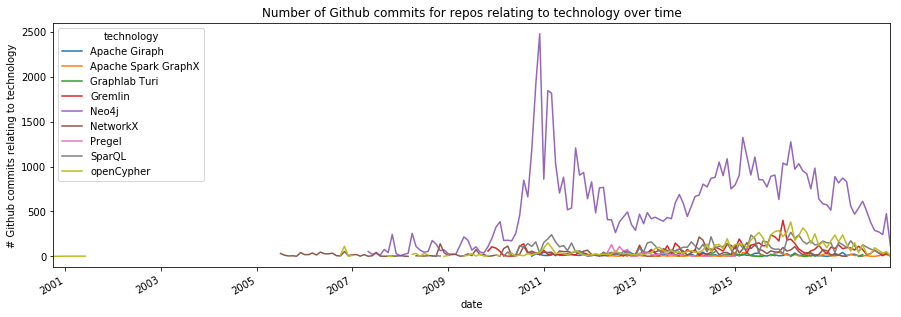

In [59]:
# df = commitsMessageTechnologyYearMonth(gp_list, gp_names)
df = commitsReposTechnologyYearMonth(gp_list, gp_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: 2ec84f17-9a79-4d46-8924-09d99b2b661d
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 9 rows.

Total time taken 5.63 s.
Finished at 2018-04-19 12:09:05.


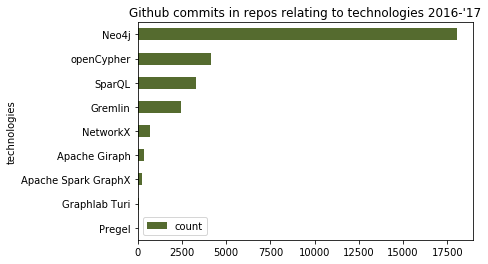

In [60]:
df = commitsReposTechnologyYear(gp_list, gp_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

According to the number of monthly Stackoverflow posts and total question view count, Neo4j is by far the most popular graph processing technology, followed by SparQL and NetworkX. Out of those technologies, NetworkX maintains the largest average viewes per question with 107, while SparQL has 83 and Neo4j 77. The accepted answer ratio is greatest for Gremlin and does not differ significantly for Neo4j, NetworkX and SparQL. However, Neo4j and NetworkX have the highest accepted answer ratio within 1 hour, indicating a responsive expert pool. Github events and commits confirm this view with Neo4j being the largest. However, it is followed by openCypher and Gremlin/SparQL. The hypothesis could be analogously to the structured query languages that Github users tend to use more open-source and advanced tools.

## Machine Learning Packages (other than for deep learning)

### Introduction

Programming languages such as R and Python provide a wide range of machine learning packages, which allow users to perform supervised and unsupervised learning on large-scale datasets. Some of these packages such as scikit-learn are comprehensive in the sense that they provide an almost complete range of algorithms for statistical learning, while other packages contain merely the implementation of specific algorithms. In this section, such packages, but also programming frameworks (such as WEKA) are compared to each other. Packages such as tensorflow used for deep learning are excluded here and covered in a separate section. The following packages will be compared:

- Apache Mahout
- Apache Spark Mllib
- Scikit (most popular [modules](http://scikit-learn.org/stable/modules/classes.html))
- Theano
- Shogun
- Mlpack (C++)
- Weka
- KNIME
- Vowpal Wabbit

### Activity Charts

In [61]:
ml_list = ['%mahout%', '%mllib%', '%scikit%', '%theano%', '%shogun%', '%mlpack%', '%weka%', '%knime%', '%vowpalwabbit%', None] 
ml_names = ['Apache Mahout', 'Apache Spark Mllib', 'Scikit (Python)', 'Theano', 'Shogun', 'Mlpack', 'Weka', 'KNIME', 'Vowpal Wabbit', None]

Requesting query... ok.
Job ID: 6233aef5-9ef2-4689-b002-0cad997a8dfc
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 388 rows.

Total time taken 3.3 s.
Finished at 2018-04-19 12:09:10.


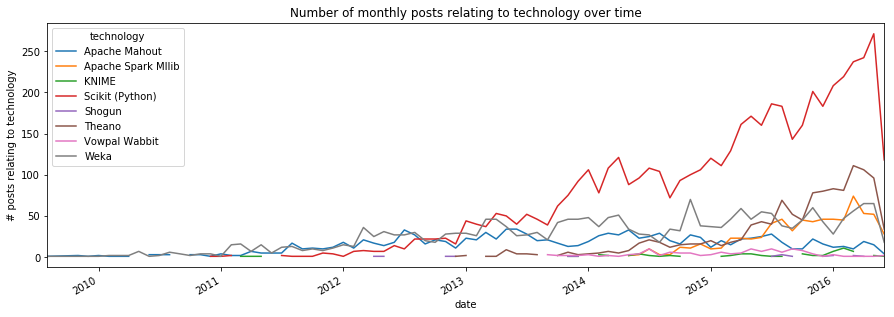

In [62]:
df = postsTechnologyYearMonth(ml_list, ml_names)
# df = questionsTechnologyYearMonth(ml_list, ml_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 7caee15b-c7c5-4302-94b5-d3e910f0f61a
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 36 rows.

Total time taken 4.5 s.
Finished at 2018-04-19 12:09:16.


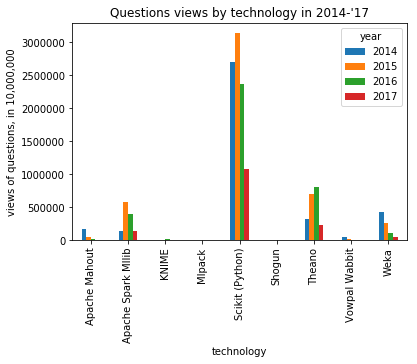

In [63]:
# df = questionsViewsTechnologyYearMonth(ml_list, ml_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(ml_list, ml_names)
df = questionsViews1417TechnologyYearMonth(ml_list, ml_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: 5f20c952-252a-4a76-89c6-15e0d94a3db6
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 10434 rows.

Total time taken 4.51 s.
Finished at 2018-04-19 12:09:22.


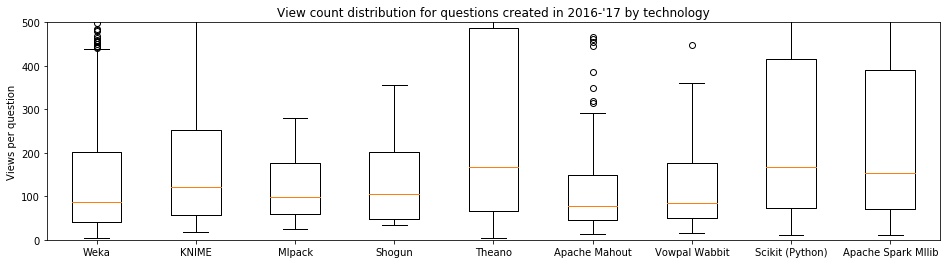

In [64]:
df = questionsViewsDistributionTechnology(ml_list, ml_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: 489bc65a-0bf4-4d2e-8d88-fbe908464430
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 36 rows.

Total time taken 3.94 s.
Finished at 2018-04-19 12:09:28.


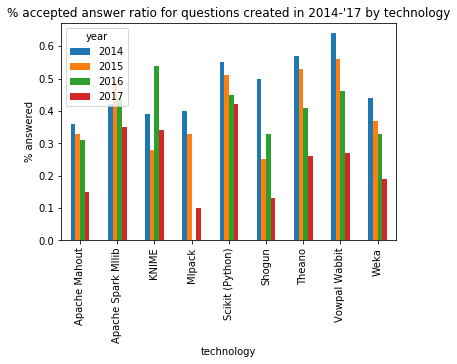

In [65]:
# df = questionsAnsweredTechnologyYearMonth(ml_list, ml_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(ml_list, ml_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: f44d8907-9689-4e37-8e87-ebaaca57ef14
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 36 rows.

Total time taken 6.17 s.
Finished at 2018-04-19 12:09:35.


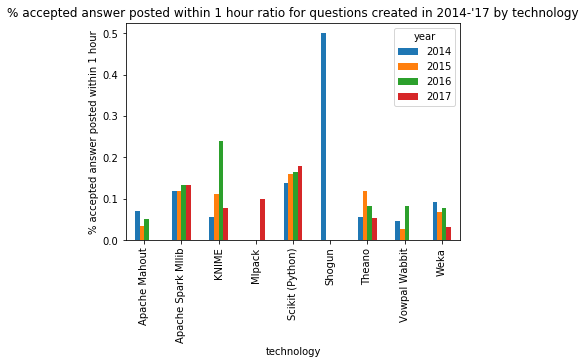

In [66]:
# df = oneHourAnsweredTechnologyYearMonth(ml_list, ml_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(ml_list, ml_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

Requesting query... ok.
Job ID: a7b19289-fa33-4761-a4d9-cc7cd308d524
Query running...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 420 rows.

Total time taken 7.86 s.
Finished at 2018-04-19 12:09:45.


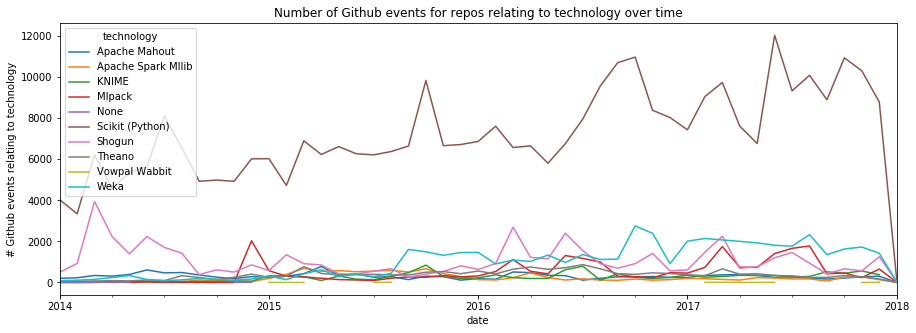

In [67]:
# df = payloadEventsTechnologyYearMonth(ml_list, ml_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(ml_list, ml_names)
# df = payloadForkEventsTechnologyYearMont(ml_list_ml_names)
df = reposEventsTechnologyYearMonth(ml_list, ml_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 5eb1cbdc-a96d-4334-9df1-d463b26d258e
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 845 rows.

Total time taken 7.15 s.
Finished at 2018-04-19 12:09:53.


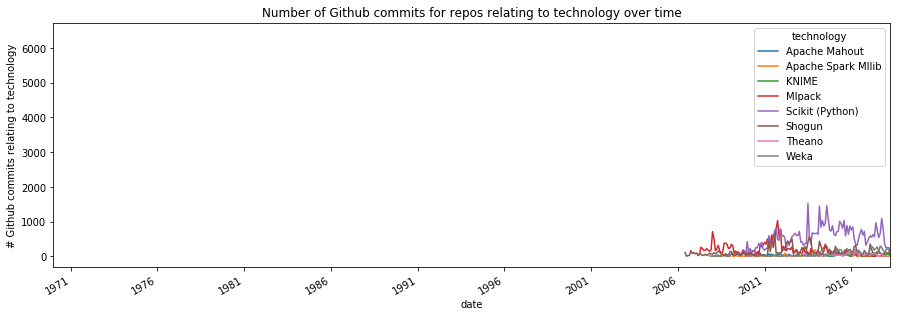

In [68]:
# df = commitsMessageTechnologyYearMonth(ml_list, ml_names)
df = commitsReposTechnologyYearMonth(ml_list, ml_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: 5a11efcc-b4b2-432e-b46d-9c5c34b1b25f
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 8 rows.

Total time taken 5.54 s.
Finished at 2018-04-19 12:10:00.


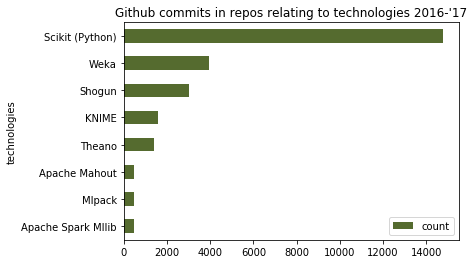

In [69]:
df = commitsReposTechnologyYear(ml_list, ml_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

### Results

Considering the amount of monthly posts and the question views, Scikit is the most popular machine learning package, significantly growing in popularity since end of 2013. It is followed by Theano, Spark Mllib and Weka. Out of those four, questions relating to Scikit, Theano and Spark Mllib are the most viewed with 167, 158, 154 on average, while the average Weka question is only viewed 88 times. Scikit and Spark Mllib also exhibit the highest long-term and within-1-hour accepted answer ratio. Github events and commits generally confirm this finding. While Apache Spark Mllib appears to be not that popular (please note that this might also be a naming issue in Github), Shogun and KNIME are also popular packages ranging behind Scikit and Weka, but before Theano.

## Deep Learning packages

### Introduction

The last category concerns deep learning packages. In contrast to supervised and unsupervised learning that deals with specific algorithms, deep learning aims at learning data representations. One of the currently widely-cited packages is Tensorflow, which was developed by Google. In one talk, Jeff Dean (2018), lead of Google's AI division, visualizes its external adoption, which will be replicated along with other plots. The following packages are compared:

- Tensorflow
- Caffe
- Theano
- mxnet
- Torch
- Keras (implementation with Tensorflow, Microsoft Cognitive Toolkit or Theano as backend)
- deeplearning4j
- Lasagne
- Microsoft Cognitive Toolkit
- Hebel

### Activity Charts

In [70]:
dl_list = ['%tensorflow%', '%caffe%', '%theano%', '%mxnet%', '%torch%', '%keras%', '%deeplearning4j%', '%lasagne%', '%microsoft-cognitive%', '%Hebel%'] 
dl_names = ['Tensorflow', 'Caffe', 'Theano', 'mxnet', 'Torch', 'Keras', 'Deeplearning4j', 'Lasagne', 'Microsoft Cognitive Toolkit', 'Hebel']

Requesting query... ok.
Job ID: c9c4dc42-9e0f-4b73-9f68-307638858352
Query running...
Query done.
Processed: 574.5 MB Billed: 575.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 148 rows.

Total time taken 5.13 s.
Finished at 2018-04-19 12:10:07.


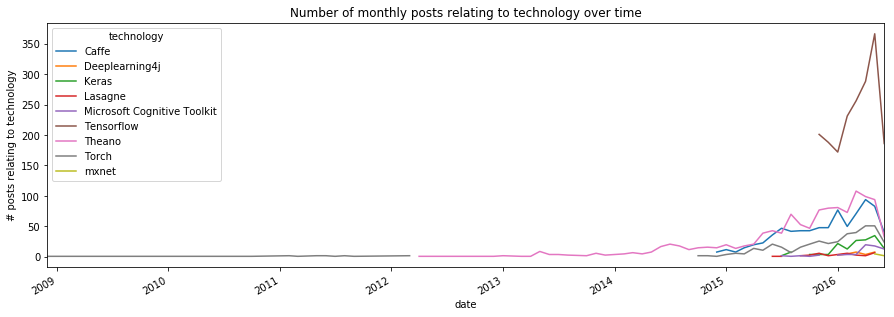

In [71]:
df = postsTechnologyYearMonth(dl_list, dl_names)
# df = questionsTechnologyYearMonth(dl_list, dl_names)
activity_chart(df, "Number of monthly posts relating to technology over time", "# posts relating to technology")

Requesting query... ok.
Job ID: 1a47fd5d-93d3-4dbb-8660-09ddacaf3e36
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 30 rows.

Total time taken 6.16 s.
Finished at 2018-04-19 12:10:14.


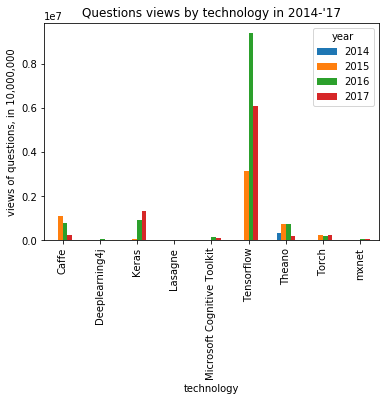

In [72]:
# df = questionsViewsTechnologyYearMonth(dl_list, dl_names)
# activity_chart(df, "View count of questions relating to technology over time", "# views relating to technology")
# df = questionsAvgViewsTechnologyYearMonth(dl_list, dl_names)
df = questionsViews1417TechnologyYearMonth(dl_list, dl_names)
activity_barplot_several(df, 'technology', 'year', 'count', "Questions views by technology in 2014-'17", "views of questions, in 10,000,000")

Requesting query... ok.
Job ID: d492d4ec-9fc5-4fcd-85a9-3a9974fa7e1d
Query running...
Query done.
Processed: 633.9 MB Billed: 634.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 29105 rows.

Total time taken 5.59 s.
Finished at 2018-04-19 12:10:21.


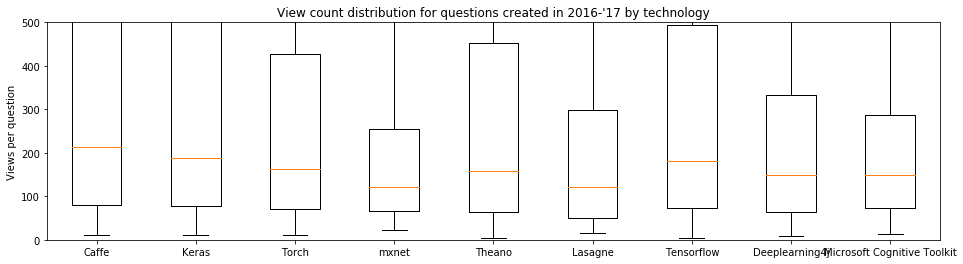

In [73]:
df = questionsViewsDistributionTechnology(dl_list, dl_names, 2016, 2017)
boxplot_single(df, "View count distribution for questions created in 2016-'17 by technology", "Views per question")

Requesting query... ok.
Job ID: e872b70d-3f94-4e48-ba51-0a3ccbd1afa8
Query running...
Query done.
Processed: 578.9 MB Billed: 579.0 MB
Standard price: $0.00 USD

Retrieving results...
Got 30 rows.

Total time taken 4.49 s.
Finished at 2018-04-19 12:10:27.


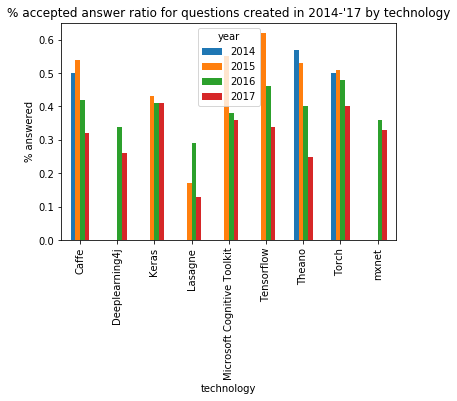

In [74]:
# df = questionsAnsweredTechnologyYearMonth(dl_list, dl_names)
df = questionsAcceptedAnsweredTechnologyYearMonth(dl_list, dl_names)
activity_barplot_several(df, 'technology', 'year', 'perc_answered', "% accepted answer ratio for questions created in 2014-'17 by technology", "% answered")

Requesting query... ok.
Job ID: 737ce472-b1b2-4162-8442-3b8ba1bb8a13
Query running...
Query done.
Processed: 1.2 GB Billed: 1.2 GB
Standard price: $0.01 USD

Retrieving results...
Got 30 rows.

Total time taken 6.8 s.
Finished at 2018-04-19 12:10:36.


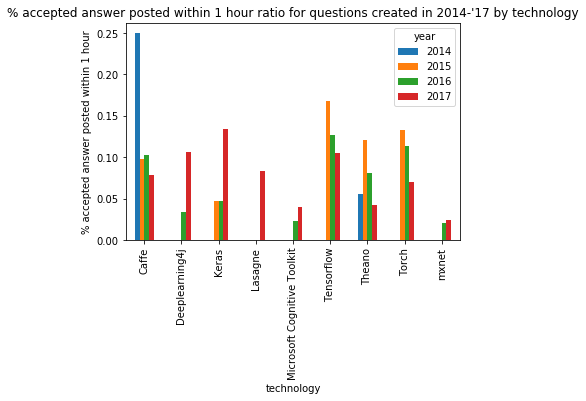

In [75]:
# df = oneHourAnsweredTechnologyYearMonth(dl_list, dl_names)
df = oneHourAcceptedAnsweredTechnologyYearMonth(dl_list, dl_names)
activity_barplot_several(df, 'technology', 'year', 'withinhour', "% accepted answer posted within 1 hour ratio for questions created in 2014-'17 by technology", "% accepted answer posted within 1 hour")

Requesting query... ok.
Job ID: 6a485564-6e44-48ab-aab1-80117f0952c4
Query running...
  Elapsed 7.21 s. Waiting...
Query done.
Processed: 31.6 GB Billed: 31.6 GB
Standard price: $0.15 USD

Retrieving results...
Got 366 rows.

Total time taken 8.82 s.
Finished at 2018-04-19 12:10:46.


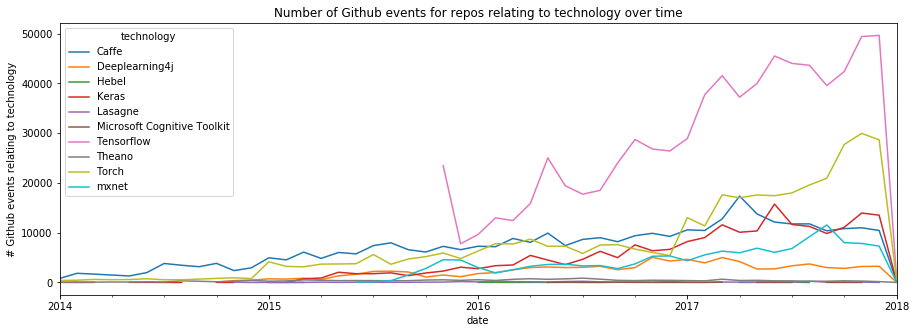

In [76]:
# df = payloadEventsTechnologyYearMonth(dl_list, dl_names) # preferably use reposEventsTechnologyYearMonth, since query processes 2.1TB data
# df = reposForkEventsTechnologyYearMonth(dl_list, dl_names)
# df = payloadForkEventsTechnologyYearMont(dl_list_dl_names)
df = reposEventsTechnologyYearMonth(dl_list, dl_names)
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

Requesting query... ok.
Job ID: 091637c4-44a4-4ec5-9338-cf1bcea81b97
Query running...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 511 rows.

Total time taken 6.23 s.
Finished at 2018-04-19 12:10:54.


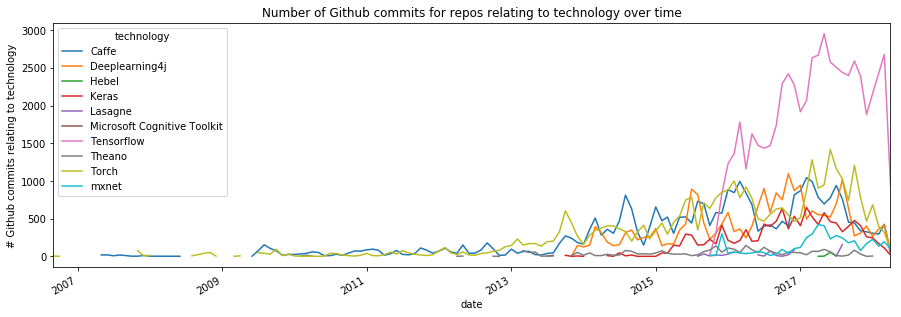

In [77]:
# df = commitsMessageTechnologyYearMonth(dl_list, dl_names)
df = commitsReposTechnologyYearMonth(dl_list, dl_names)
activity_chart(df, "Number of Github commits for repos relating to technology over time", "# Github commits relating to technology")

Requesting query... ok.
Job ID: 7bca0eea-b33c-4e6e-be4c-b15ded9082c3
Query running...
  Elapsed 7.62 s. Waiting...
  Elapsed 8.98 s. Waiting...
  Elapsed 10.44 s. Waiting...
  Elapsed 11.69 s. Waiting...
  Elapsed 13.06 s. Waiting...
  Elapsed 14.31 s. Waiting...
  Elapsed 15.88 s. Waiting...
Query done.
Processed: 94.5 GB Billed: 94.5 GB
Standard price: $0.46 USD

Retrieving results...
Got 10 rows.

Total time taken 18.0 s.
Finished at 2018-04-19 12:11:13.


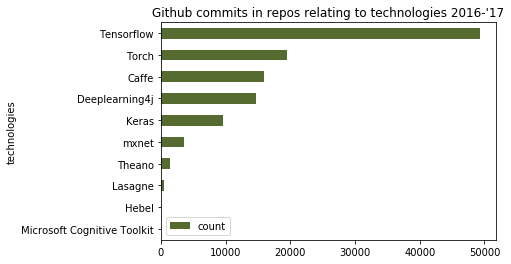

In [78]:
df = commitsReposTechnologyYear(dl_list, dl_names, 2016, 2017)
activity_barplot_single(df, "Github commits in repos relating to technologies 2016-'17", "technologies")

Requesting query... ok.
Job ID: 163c4535-74b4-4063-be64-59536c70aa8c
Query running...
  Elapsed 8.21 s. Waiting...
  Elapsed 9.54 s. Waiting...
Query done.
Processed: 44.6 GB Billed: 44.6 GB
Standard price: $0.22 USD

Retrieving results...
Got 7 rows.

Total time taken 11.02 s.
Finished at 2018-04-19 12:11:26.


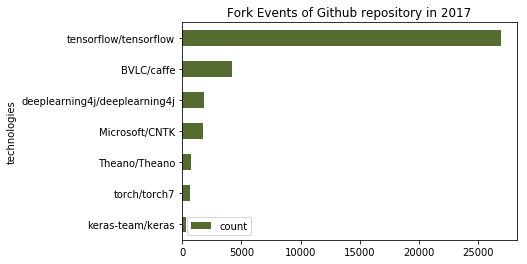

In [79]:
dl_pack = ['tensorflow/tensorflow', 'Theano/Theano', 'torch/torch7', 'deeplearning4j/deeplearning4j', 'keras-team/keras', 'BVLC/caffe', 'Microsoft/CNTK']
start_year = 2017
end_year = 2017

query = """SELECT repo, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        type, repo
        FROM 
        (SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2017`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2016`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2015`
        UNION ALL SELECT type, created_at, repo.name AS repo FROM `githubarchive.year.2014`)) as techtable
        WHERE (repo = '{}' OR repo = '{}' OR repo = '{}' OR repo = '{}' OR repo = '{}' OR repo = '{}' OR repo = '{}') AND type = 'ForkEvent' AND year BETWEEN {} AND {}
        GROUP BY repo
        ORDER BY count DESC""".format(*dl_pack, start_year, end_year)
    
df = pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard')
activity_barplot_single(df, "Fork Events of Github repository in 2017", "technologies")

Jeff Dean's chart on cumulative fork events on Github repositories:
<img src="tensorflow_adoption.jpg">

### Results

The number of posts relating to the packages shows the emerging nature of the field of deep learning. Most packages only show a meaningful number of monthly posts in mid-2015. In line with Jeff Dean's charts, Tensorflow turns out to be the most popular package measured by the number of Stackoverflow posts and question views, followed by Theano and Caffee. In terms of total view count, Keras shows a significant rise in 2017. In comparison to the sections above, deep learning packages show a high median number of view count per question (Tensorflow 181, Keras 189, Theano 158, Caffe 213). Both for the long-term and within-1-hour accepted answer ratio, Keras and Tensorflow show high scores. The Github data confirm the popularity derived from Stackoverflow with Tensorflow-relating repositories having significantly more events and commits, followed by Torch, Caffe, Deeplearning4j and Keras. Considering the number of fork events for the official Github repository confirms this finding with Tensorflow being first with Caffee, Deeplearning4j and Microsoft Cognitive Toolkit behind.

# User Guide

The following section is meant to describe how to use the code in the project and describe, which attempts did not work. The usage of the code is relatively straightforward:
1. Ensure all languages and packages as listed under System Requirements are properly installed
2. Set up Goolge Cloud credentials through CLI: gcloud auth application-default login
3. Within the import/set-up section, exchange the project-id with a new one associated with the user's Google Cloud account
4. Run and extend relevant code. The queries are all included in functions in the Stackoverflow and Github section and can be called from there. There are also a few vizualisations available. In the functions, the project id has to be updated. In the Big Data Technologies sections, some code is commented out, which provides additional plots. For the sake of space, they are not included in this report, since they did not provide value-add beyond the used plot, but can be run easily by uncommenting the row.

When working through this project, a few items did not work out, which I would like to point out:
- Initially, I was trying to import the Google BigQuery results into an RDD rather than a simple dataframe, following the [bigquery spark connector website](https://cloud.google.com/dataproc/docs/tutorials/bigquery-connector-spark-example). However, this connection did not work. I talked to Christine who also encountered an error when running it
- Instead of using 'WHEN repo like '{}' THEN {}' for every technology, I was looking for a SQL-equivalent of a vlookup function or alternatively an iterator rather than (as I eventually did) repeating the statement 10 times. However, I was not successful in finding appropriate SQL syntax to tackle this issue

# Conclusion

This report analyses and compares the popularity of various Big Data technologies. It also provides an API for using the publicly-available StackOverflow and Github datasets via Google BigQuery to replicate and extend the findings in this report. The main findings will be described below by Big Data technology group.
- **Distributed key-value stores**: Both for Stackoverflow and Github, MongoDB appears to be the most popular key-value store, followed by Apache Cassandra and Amazon Dynamo
- **Data processing engines**: Since its release in 2014, Spark has shown a significant increase in popularity overtaking hadoop in mid-2015. While Stackoverflow and Github data show varying magnitudes of this difference, both confirm this general trend.
- **Stream processing**: In terms of Stackoverflow data, Apache Kafka and Apache Spark Streaming have experienced significant increases in popularity since 2015 and are today the most popular stream processing technologies. Github data confirms the popularity of Kafka, but is not conclusive on Spark Streaming due to naming issues
- **Structured Queries over big datasets**: According to Stackoverflow, Apache Spark SQL and Google BigQuery are the most widely-used structured query languages for large-scale datasets. Github shows a high popularity for Presto and Apache Hive, but is not conclusive for Apache Spark SQL due to possible naming issues.
- **Graph Data Processing**: Particularly since mid-2012, Neo4j has experienced a significant grwoth in Stackoverflow posts and views. Until today, it continues to be the most popular graph processing technology on Stackoverflow and Github
- **Machine Learning Packages (other than for deep learning)**: According to Stackoverflow and Github data, Scikit-learn is the most popular machine learning package for purposes other than deep learning. It is followed by Theano and Apache Spark Mllib on Stackoverflow and Weka and Shogun on Github.
- **Deep Learning Packages**: The charts illustrate that deep learning is a relatively new trend, rising in popularity since mid-2015. In line with previously published charts, Tensorflow is the most popular deep learning package, followed by Microsoft Cognitive Toolkit and Caffe on Stackoverflow. On Github, Caffe and Deeplearning4j are the second- and third-most folked repositories.

# System Requirements

- Python
- Python Packages: google.cloud, oauth2client.client, pandas, numpy, matplotlib.pyplot, seaborn, datetime
- Pyspark
- BigQuery REST API

# References

Avinoam, R. (2018). Redshift vs. BigQuery: The Full Comparison. [online] Available at: https://blog.panoply.io/a-full-comparison-of-redshift-and-bigquery [Accessed 14 Mar. 2018].

Dean, Jeff (2018). [online] Available at: https://www.matroid.com/scaledml/slides/jeff.pdf [Accessed 19 Apr. 2018].

Harizopoulos, S., Abadi, D. and Boncz, P. (2009). Column-Oriented Database Systems. VLDB 2009 Tutorial. [online] Available at: http://cs-www.cs.yale.edu/homes/dna/talks/Column_Store_Tutorial_VLDB09.pdf [Accessed 14 Mar. 2018].

Melnik, S., Gubarev, A., Long, J., Romer, G., Shivakumar, S., Tolton, M. and Vassilakis, T. (2010). Dremel: Interactive Analysis of Web-Scale Datasets. Proceedings of the VLDB Endowment, 3(1).

Nunns, J. (2016). Azure SQL DW: the next-generation data warehouse [online] Available at: https://www.slalom.com/thinking/azure-sql-dw [Accessed 14 Mar. 2018].

Sato, K. (2012). An Inside Look at Google BigQuery. Technical Working Papers Google. [online] Available at: https://cloud.google.com/files/BigQueryTechnicalWP.pdf [Accessed 14 Mar. 2018].

Stonebraker, M., Cetintemel, U. & Zdonik, S. (20015). The 8 requirements of real-time stream processing. ACM SIGMOD Record, 34(4), pp.42-47. Available at: https://ix.cs.uoregon.edu/~jsventek/papers/02bStonebraker2005.pdf

Wikipedia (2018a). SQL syntax. [online] Available at: https://en.wikipedia.org/wiki/SQL_syntax [Accessed 19 Apr. 2018].

Wikipedia (2018b). MySQL. [online] Available at: https://en.wikipedia.org/wiki/MySQL [Accessed 19 Apr. 2018].

# Appendix

### List of functions

In [ ]:
postsTechnologyYearMonth(technology, names) # posts count by technology, year, month
questionsTechnologyYearMonth(technology, names) # questions created by technology, year, month
questionsViewsTechnologyYearMonth(technology, names) # questions view count by technology, year, month
questionsViews1417TechnologyYearMonth(technology, names) # total view count of questions created in 2014-17 by technology
questionsAvgViewsTechnologyYearMonth(technology, names) # Avg. view count of questions created in 2014-17 by technology
questionsAnsweredTechnologyYearMonth(technology, names) # % answer ratio for questions created in 2014-2017 by technology
questionsAcceptedAnsweredTechnologyYearMonth(technology, names) # % accepted answer ratio for questions created in 2014-2017 by technology
oneHourAnsweredTechnologyYearMonth(technology, names) # % answer ratio within 1 hour for questions created in 2014-2017 by technology
payloadEventsTechnologyYearMonth(technology, names) # Monthly Events between 2014-2017 with payload containing technology
reposEventsTechnologyYearMonth(technology, names) # Monthly Events between 2014-2017 with repo name containing technology
payloadForkEventsTechnologyYearMonth(technology, names) # ONLY Monthly Fork Events between 2014-2017 with payload containing technology
reposForkEventsTechnologyYearMonth(technology, names) # ONLY Monthly Fork Events between 2014-2017 with repo name containing technology
commitsReposTechnologyYearMonth(technology, name) # Monthly commits for repos with name containing technology by month, year
commitsMessageTechnologyYearMonth(technology, name) # Monthly commits with message containing technology by month, year

### Posts created by technology by year-month using RDD - Selected technologies

In [ ]:
# Please select technologies of interest
lang = ('apache-spark', 'pyspark', 'hive', 'hbase', 'hadoop', 'cassandra', 'apache-kafka')
df_lang = lang_filter(df, lang)
activity_chart(df_lang)

### Github Commits - Manual with multiple search criteria

In [ ]:
query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM created_at) AS year,
        EXTRACT (MONTH FROM created_at) AS month,
        CASE WHEN repo like '%spark%' AND repo like '%sql%'
            THEN 'Apache Spark SQL'
        WHEN repo like 'hive%'
            THEN 'Apache Hive'
        WHEN repo like '%bigquery%'
            THEN 'Google BigQuery'
        WHEN repo like '%presto%'
            THEN 'Presto'
        WHEN repo like '%redshift%'
            THEN 'Amazon Redshift'
        WHEN repo like '%azure%' AND repo like '%sql%'
            THEN 'Microsoft Azure SQL'
        END as technology
        FROM 
        (SELECT created_at, repo.name AS repo FROM `githubarchive.year.2017`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2016`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2015`
        UNION ALL SELECT created_at, repo.name AS repo FROM `githubarchive.year.2014`)) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology"""
    
df = pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard')
activity_chart(df, "Number of Github events for repos relating to technology over time", "# Github events relating to technology")

### Stackoverflow Posts by year-month and technology - combinations of technologies

In [6]:
# The function returns the posts for specified technology combinations, e.g. MongoDB and Spark
# Technologies for combination should be listed after each other with the name as the third entry, each two technologies are combined and then subsequently compared against the other pairs, up to 5 pairs

tech = ["%mongodb%", "%spark%", "MongoDB & Spark", "%bigtable%", "%hadoop%", "Bigtable & Hadoop", ...]


def postsTechnologyYearMonthComb(tech):
    
    query = """SELECT year, month, technology, count(*) as count
        FROM
        ( SELECT EXTRACT (YEAR FROM creation_date) AS year,
        EXTRACT (MONTH FROM creation_date) AS month,
        CASE WHEN tags like '{}' AND tags like '{}'
            THEN '{}'
        WHEN tags like '{}' AND tags like '{}'
            THEN '{}'
        WHEN tags like '{}' AND tags like '{}'
            THEN '{}'
        WHEN tags like '{}' AND tags like '{}'
            THEN '{}'
        WHEN tags like '{}' AND tags like '{}'
            THEN '{}'
        END as technology
        FROM `bigquery-public-data.stackoverflow.stackoverflow_posts` ) as techtable
        WHERE technology IS NOT NULL
        GROUP BY year, month, technology""".format(*tech)
    
    return(pd.read_gbq(query, project_id = "st446-activitycharts", dialect='standard'))